In [ ]:
import shutil

# Pfad zum Dataset-Ordner
dataset_dir = "/content/dataset"

# Dataset-Ordner löschen
try:
    shutil.rmtree(dataset_dir)
    print(f"Der Ordner {dataset_dir} wurde erfolgreich gelöscht.")
except FileNotFoundError:
    print(f"Der Ordner {dataset_dir} existiert nicht.")
except Exception as e:
    print(f"Fehler beim Löschen des Ordners {dataset_dir}: {e}")


Der Ordner /content/dataset wurde erfolgreich gelöscht.


In [ ]:
from google.colab import drive
import zipfile

# Google Drive mounten
drive.mount('/content/drive')

# Pfad zur ZIP-Datei
zip_path = '/content/drive/MyDrive/autoencoder_dataset.zip'

# Entpacken der ZIP-Datei
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/dataset')

print("Dataset entpackt!")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset entpackt!


In [ ]:
import os
import shutil

# Liste der Klassen
classes = [
    "rechts_abbiegen",
    "links_abbiegen",
    "geradeaus",
    "geradeaus_rechts",
    "geradeaus_links",
    "zebrastreifen"
]

# Basisverzeichnisse
dataset_dir = "/content/dataset"
train_dir = os.path.join(dataset_dir, "train")
val_dir = os.path.join(dataset_dir, "val")
test_dir = os.path.join(dataset_dir, "test")

# Zielverzeichnisse für `val` und `test` erstellen
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Kopieren des `output`-Ordners aus `train` nach `val` und `test`
for class_name in classes:
    train_output_dir = os.path.join(train_dir, class_name, "output")
    val_output_dir = os.path.join(val_dir, class_name, "output")
    test_output_dir = os.path.join(test_dir, class_name, "output")

    # Überprüfen, ob der `output`-Ordner existiert
    if not os.path.exists(train_output_dir):
        print(f"Output-Ordner nicht gefunden: {train_output_dir}")
        continue

    # Zielordner erstellen und Dateien kopieren
    try:
        # Kopieren nach `val`
        os.makedirs(val_output_dir, exist_ok=True)
        shutil.copytree(train_output_dir, val_output_dir, dirs_exist_ok=True)
        print(f"Output-Ordner von {train_output_dir} nach {val_output_dir} kopiert.")

        # Kopieren nach `test`
        os.makedirs(test_output_dir, exist_ok=True)
        shutil.copytree(train_output_dir, test_output_dir, dirs_exist_ok=True)
        print(f"Output-Ordner von {train_output_dir} nach {test_output_dir} kopiert.")
    except Exception as e:
        print(f"Fehler beim Kopieren des Ordners {train_output_dir}: {e}")

print("Kopieren der `output`-Ordner abgeschlossen.")


Output-Ordner von /content/dataset/train/rechts_abbiegen/output nach /content/dataset/val/rechts_abbiegen/output kopiert.
Output-Ordner von /content/dataset/train/rechts_abbiegen/output nach /content/dataset/test/rechts_abbiegen/output kopiert.
Output-Ordner von /content/dataset/train/links_abbiegen/output nach /content/dataset/val/links_abbiegen/output kopiert.
Output-Ordner von /content/dataset/train/links_abbiegen/output nach /content/dataset/test/links_abbiegen/output kopiert.
Output-Ordner von /content/dataset/train/geradeaus/output nach /content/dataset/val/geradeaus/output kopiert.
Output-Ordner von /content/dataset/train/geradeaus/output nach /content/dataset/test/geradeaus/output kopiert.
Output-Ordner von /content/dataset/train/geradeaus_rechts/output nach /content/dataset/val/geradeaus_rechts/output kopiert.
Output-Ordner von /content/dataset/train/geradeaus_rechts/output nach /content/dataset/test/geradeaus_rechts/output kopiert.
Output-Ordner von /content/dataset/train/ger

In [ ]:
import os

dataset_path = '/content/dataset'
print("Dataset-Inhalt:")
for root, dirs, files in os.walk(dataset_path):
    print(root, "enthält", len(files), "Dateien.")


Dataset-Inhalt:
/content/dataset enthält 0 Dateien.
/content/dataset/test enthält 0 Dateien.
/content/dataset/test/links_abbiegen enthält 0 Dateien.
/content/dataset/test/links_abbiegen/input enthält 101 Dateien.
/content/dataset/test/links_abbiegen/output enthält 1 Dateien.
/content/dataset/test/zebrastreifen enthält 0 Dateien.
/content/dataset/test/zebrastreifen/input enthält 100 Dateien.
/content/dataset/test/zebrastreifen/output enthält 1 Dateien.
/content/dataset/test/geradeaus enthält 0 Dateien.
/content/dataset/test/geradeaus/Untitled Folder enthält 0 Dateien.
/content/dataset/test/geradeaus/input enthält 101 Dateien.
/content/dataset/test/geradeaus/output enthält 1 Dateien.
/content/dataset/test/geradeaus_links enthält 0 Dateien.
/content/dataset/test/geradeaus_links/input enthält 100 Dateien.
/content/dataset/test/geradeaus_links/output enthält 1 Dateien.
/content/dataset/test/rechts_abbiegen enthält 0 Dateien.
/content/dataset/test/rechts_abbiegen/input enthält 101 Dateien.
/

In [ ]:
import os
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

# Custom Dataset-Klasse
class TrafficSignDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        """
        Args:
            root_dir (str): Basisverzeichnis des Datensatzes (z.B. '/content/dataset/train').
            transform (callable, optional): Transformationen für die Bilder.
        """
        self.root_dir = root_dir
        self.transform = transform
        self.data = []

        # Klassen durchgehen
        for class_name in os.listdir(root_dir):
            class_dir = os.path.join(root_dir, class_name)

            # Ordner für output und input
            output_dir = os.path.join(class_dir, "output")
            input_dir = os.path.join(class_dir, "input")

            # Zielbild (clear.png) prüfen
            clear_path = os.path.join(output_dir, "clear.png")
            if not os.path.exists(clear_path):
                print(f"Warnung: clear.png fehlt in {output_dir}")
                continue

            # Alle Eingabebilder im input-Ordner durchgehen
            for file_name in os.listdir(input_dir):
                if file_name.endswith(".png"):
                    input_path = os.path.join(input_dir, file_name)

                    # Daten hinzufügen
                    self.data.append({
                        "output": clear_path,
                        "input": input_path,
                        "class": class_name
                    })

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        # Daten für den Index abrufen
        item = self.data[idx]

        # Bilder laden
        output_image = Image.open(item["output"]).convert("RGB")
        input_image = Image.open(item["input"]).convert("RGB")

        # Transformationen anwenden
        if self.transform:
            output_image = self.transform(output_image)
            input_image = self.transform(input_image)

        # Rückgabe der Bilder und der Klasse
        return {
            "output": output_image,
            "input": input_image,
            "class": item["class"]
        }

# Datenvorverarbeitung definieren
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalisierung auf [-1, 1]
])

# Dataset initialisieren
train_dataset = TrafficSignDataset(root_dir="/content/dataset/train", transform=transform)
val_dataset = TrafficSignDataset(root_dir="/content/dataset/val", transform=transform)

# DataLoader erstellen
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Dataset überprüfen
print(f"Trainingsbeispiele: {len(train_dataset)}")
print(f"Validierungsbeispiele: {len(val_dataset)}")

# Beispiel-Durchlauf durch den DataLoader
for batch in train_loader:
    print("Batch-Größe:", len(batch["output"]))
    print("Output-Shape:", batch["output"].shape)
    print("Input-Shape:", batch["input"].shape)
    print("Klassen:", batch["class"][:5])
    break


Trainingsbeispiele: 5453
Validierungsbeispiele: 1065
Batch-Größe: 32
Output-Shape: torch.Size([32, 3, 64, 64])
Input-Shape: torch.Size([32, 3, 64, 64])
Klassen: ['zebrastreifen', 'rechts_abbiegen', 'zebrastreifen', 'rechts_abbiegen', 'rechts_abbiegen']


In [ ]:
import torch

# Globale Variablen für Maximal- und Minimalwerte
global_max = float('-inf')
global_min = float('inf')

# Iteriere durch den DataLoader
for batch in train_loader:
    input_images = batch["input"]  # Maskiertes Bild
    target_images = batch["output"]  # Originalbild

    # Finde Maximal- und Minimalwerte für das aktuelle Batch
    batch_max_input = torch.max(input_images)
    batch_min_input = torch.min(input_images)

    batch_max_target = torch.max(target_images)
    batch_min_target = torch.min(target_images)

    # Aktualisiere globale Maximal- und Minimalwerte
    global_max = max(global_max, batch_max_input.item(), batch_max_target.item())
    global_min = min(global_min, batch_min_input.item(), batch_min_target.item())

# Ausgabe der Ergebnisse
print(f"Globaler Maximalwert im Dataset: {global_max}")
print(f"Globaler Minimalwert im Dataset: {global_min}")


Globaler Maximalwert im Dataset: 1.0
Globaler Minimalwert im Dataset: -1.0


In [ ]:
import torch.nn as nn
import torch.optim as optim
from torchvision.utils import save_image

# Modellarchitektur
class MaskedAutoencoder(nn.Module):
    def __init__(self):
        super(MaskedAutoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=4, stride=2, padding=1),  # 64x64 -> 32x32
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1),  # 32x32 -> 16x16
            nn.ReLU(),
            nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1),  # 16x16 -> 8x8
            nn.ReLU(),
            nn.Conv2d(256, 512, kernel_size=4, stride=2, padding=1),  # 8x8 -> 4x4
            nn.ReLU(),
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(512, 256, kernel_size=4, stride=2, padding=1),  # 4x4 -> 8x8
            nn.ReLU(),
            nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1),  # 8x8 -> 16x16
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),  # 16x16 -> 32x32
            nn.ReLU(),
            nn.ConvTranspose2d(64, 3, kernel_size=4, stride=2, padding=1),  # 32x32 -> 64x64
            nn.Tanh(),
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Gerät definieren
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Verwendetes Gerät: {device}")

# Modell initialisieren
model = MaskedAutoencoder().to(device)

# Optimierer und Verlustfunktion
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

# Trainingsparameter
epochs = 10

# Trainingsschleife
for epoch in range(epochs):
    model.train()
    train_loss = 0

    print(f"\nEpoch {epoch + 1}/{epochs}")

    # Training
    for batch in train_loader:
        input_images = batch["input"].to(device)
        target_images = batch["output"].to(device)

        # Vorwärtsdurchlauf
        reconstructed_images = model(input_images)

        # Verlust berechnen
        loss = criterion(reconstructed_images, target_images)

        # Rückwärtsdurchlauf und Optimierung
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    avg_train_loss = train_loss / len(train_loader)
    print(f"Training Loss: {avg_train_loss:.4f}")

    # Validierung
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for batch in val_loader:
            input_images = batch["input"].to(device)
            target_images = batch["output"].to(device)

            reconstructed_images = model(input_images)

            loss = criterion(reconstructed_images, target_images)
            val_loss += loss.item()

    avg_val_loss = val_loss / len(val_loader)
    print(f"Validation Loss: {avg_val_loss:.4f}")

    # Beispielbilder speichern
    if epoch % 5 == 0 or epoch == epochs - 1:
        os.makedirs("results", exist_ok=True)
        save_image(reconstructed_images[:8], f"results/reconstructed_epoch_{epoch + 1}.png")
        save_image(input_images[:8], f"results/input_epoch_{epoch + 1}.png")
        save_image(target_images[:8], f"results/target_epoch_{epoch + 1}.png")


Verwendetes Gerät: cuda

Epoch 1/10
Training Loss: 0.0730
Validation Loss: 0.0159

Epoch 2/10
Training Loss: 0.0086
Validation Loss: 0.0047

Epoch 3/10
Training Loss: 0.0032
Validation Loss: 0.0023

Epoch 4/10
Training Loss: 0.0018
Validation Loss: 0.0016

Epoch 5/10
Training Loss: 0.0012
Validation Loss: 0.0014

Epoch 6/10
Training Loss: 0.0008
Validation Loss: 0.0012

Epoch 7/10
Training Loss: 0.0007
Validation Loss: 0.0007

Epoch 8/10
Training Loss: 0.0004
Validation Loss: 0.0009

Epoch 9/10
Training Loss: 0.0004
Validation Loss: 0.0006

Epoch 10/10
Training Loss: 0.0005
Validation Loss: 0.0006


Zeige input-Bilder aus Epoche 10:


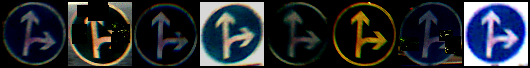

Zeige reconstructed-Bilder aus Epoche 10:


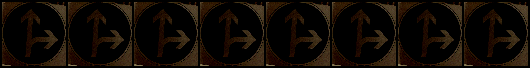

Zeige target-Bilder aus Epoche 10:


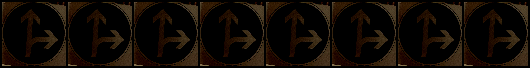

In [ ]:
from IPython.display import Image as IPImage, display

# Visualisiere Bilder aus der letzten Epoche
for img_type in ["input", "reconstructed", "target"]:
    img_path = f"results/{img_type}_epoch_10.png"
    print(f"Zeige {img_type}-Bilder aus Epoche 10:")
    display(IPImage(img_path))



In [ ]:
# Speicherpfad für das Modell
model_save_path = "mask.pth"

# Speichern der Modellparameter
torch.save(model.state_dict(), model_save_path)
print(f"Modell erfolgreich unter {model_save_path} gespeichert.")


Modell erfolgreich unter mask.pth gespeichert.


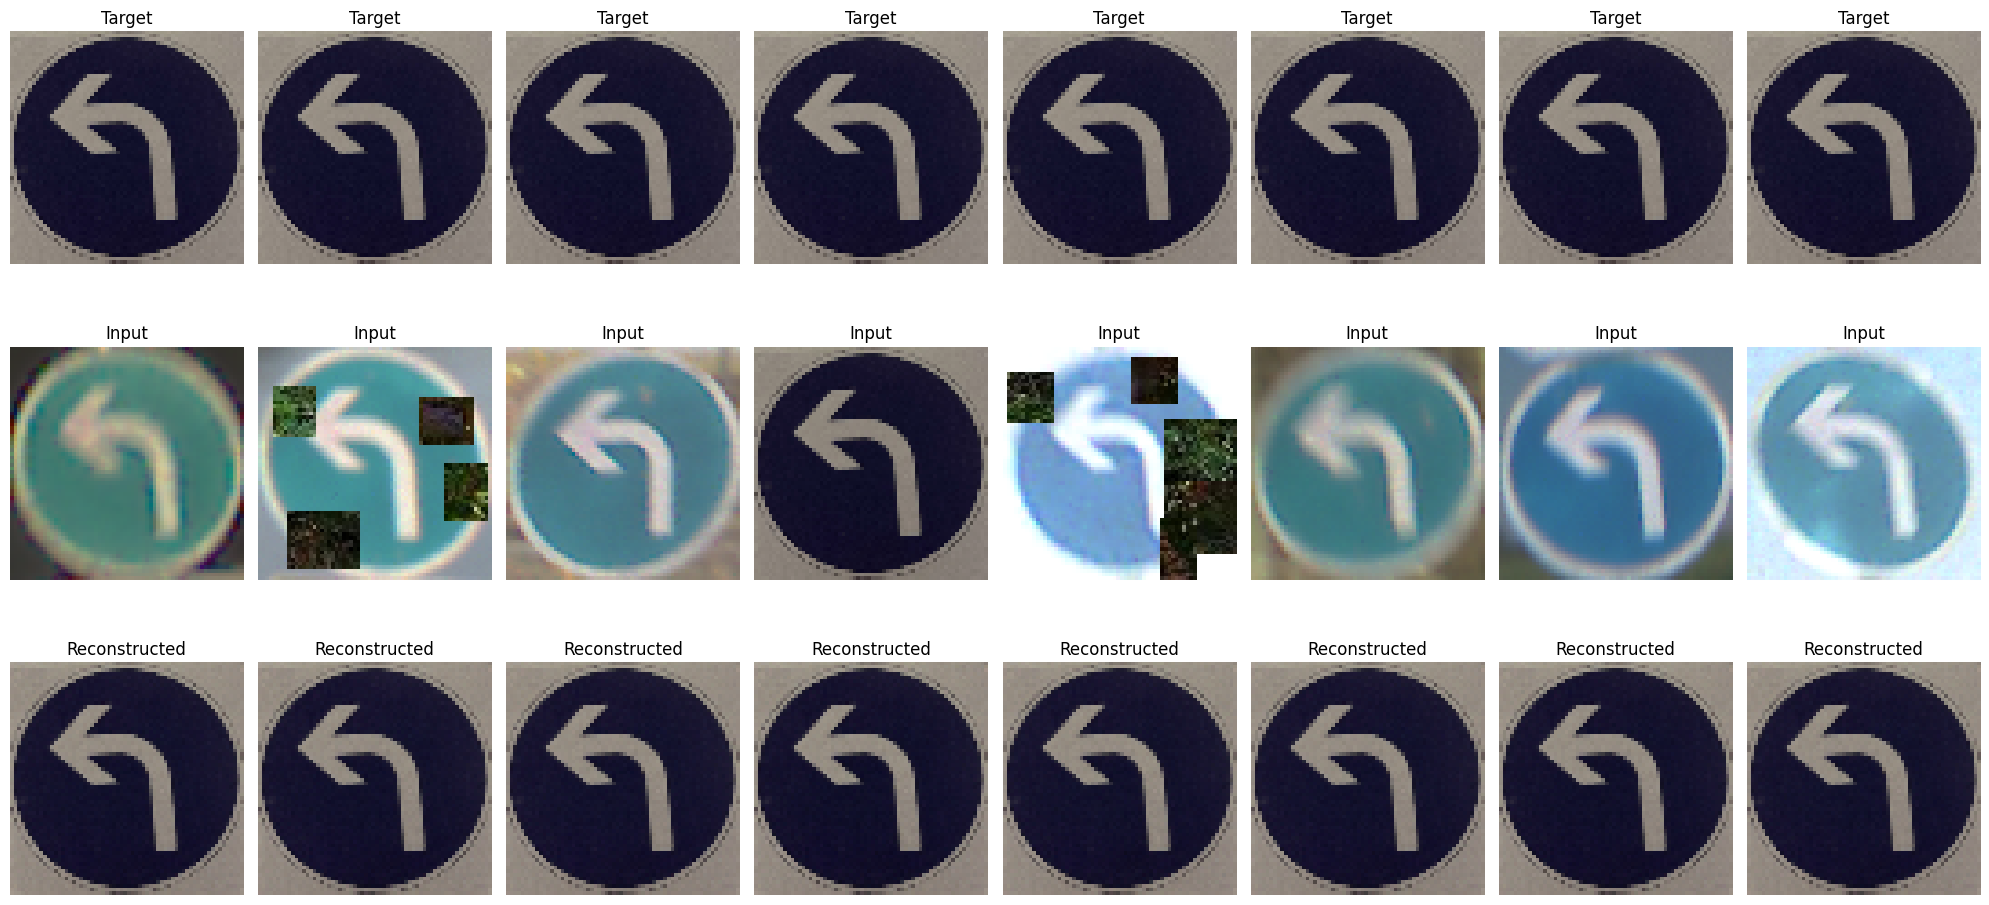

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Modell in den Evaluierungsmodus setzen
model.eval()

# Visualisierung aus der Validierung
with torch.no_grad():
    for batch in val_loader:
        # Eingabebilder und Zielbilder auf das Gerät laden
        input_images = batch["input"].to(device)  # Maskierte Eingabebilder
        target_images = batch["output"].to(device)  # Klare Zielbilder

        # Modellvorhersagen
        reconstructed_images = model(input_images)

        # Normalisierung rückgängig machen
        target_images = (target_images.cpu().numpy() * 0.5 + 0.5).clip(0, 1)
        input_images = (input_images.cpu().numpy() * 0.5 + 0.5).clip(0, 1)
        reconstructed_images = (reconstructed_images.cpu().numpy() * 0.5 + 0.5).clip(0, 1)

        # Visualisierung der Bilder
        fig, axes = plt.subplots(3, 8, figsize=(20, 10))  # 3 Zeilen: Target, Input, Reconstructed

        for i in range(8):  # Zeige 8 Bilder
            # Zielbilder
            axes[0, i].imshow(target_images[i].transpose(1, 2, 0))
            axes[0, i].set_title("Target")
            axes[0, i].axis("off")

            # Eingabebilder (maskierte Bilder)
            axes[1, i].imshow(input_images[i].transpose(1, 2, 0))
            axes[1, i].set_title("Input")
            axes[1, i].axis("off")

            # Rekonstruierte Bilder
            axes[2, i].imshow(reconstructed_images[i].transpose(1, 2, 0))
            axes[2, i].set_title("Reconstructed")
            axes[2, i].axis("off")

        plt.tight_layout()
        plt.show()
        break  # Zeige nur den ersten Batch


In [ ]:
pip install onnx onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 71.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 112.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 8.7 MB/s eta 0:00:00


In [ ]:
import torch
import torch.onnx
import onnx
import onnxruntime

# Exportiere das Modell ins ONNX-Format
def export_to_onnx(model, export_path="decoder_ncoder.onnx"):
    # Dummy-Eingabe erstellen (Größe des Eingabebildes, z. B. Batchgröße=1, 3 Kanäle, 64x64)
    dummy_input = torch.randn(1, 3, 64, 64).to(device)  # Batchgröße=1, RGB-Kanäle, Bildgröße 64x64

    # Exportieren
    torch.onnx.export(
        model,  # Das trainierte Modell
        dummy_input,  # Dummy-Eingabe
        export_path,  # Zielpfad
        export_params=True,  # Parameter mit dem Modell exportieren
        opset_version=11,  # ONNX-Standard-OpSet (TensorRT unterstützt OpSet 11 gut)
        do_constant_folding=True,  # Konstanten falten, um das Modell zu optimieren
        input_names=["input"],  # Eingabename im ONNX-Graphen
        output_names=["output"],  # Ausgabename im ONNX-Graphen
        dynamic_axes={  # Dynamische Größen (Batchgröße variabel machen)
            "input": {0: "batch_size"},
            "output": {0: "batch_size"}
        }
    )
    print(f"Modell erfolgreich als ONNX exportiert: {export_path}")

# Teste das exportierte ONNX-Modell



In [ ]:
model.eval()  # Modell in Evaluierungsmodus setzen
export_to_onnx(model, export_path="decoder_ncoder.onnx")

Modell erfolgreich als ONNX exportiert: decoder_ncoder.onnx


In [ ]:
import onnx
import onnxruntime as ort
import numpy as np

# ONNX-Modell laden
onnx_model = "decoder_ncoder.onnx"
onnx.checker.check_model(onnx_model)  # Überprüft die Korrektheit
print("ONNX-Modell erfolgreich geladen und überprüft.")

# ONNX Runtime-Sitzung erstellen
ort_session = ort.InferenceSession(onnx_model)

# Dummy-Eingabe (z. B. ein Testbild mit der gleichen Form wie die Trainingsbilder)
dummy_input = np.random.randn(1, 3, 64, 64).astype(np.float32)

# Vorhersage mit ONNX Runtime
outputs = ort_session.run(
    None,  # Alle Ausgaben
    {"input": dummy_input}  # Eingaben mit Namen
)

print(f"ONNX-Vorhersage erfolgreich. Ausgabeform: {outputs[0].shape}")


ONNX-Modell erfolgreich geladen und überprüft.
ONNX-Vorhersage erfolgreich. Ausgabeform: (1, 3, 64, 64)


In [ ]:
import os
import numpy as np
import onnxruntime as ort
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

# ONNX-Modellpfad
onnx_model_path = "/content/decoder_ncoder.onnx"

# Testbilder Verzeichnisse
input_dir = "/content/extracted1/input"
output_dir = "/content/extracted1/output"

# Bildvorverarbeitung
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalisierung auf [-1, 1]
])

# Rücknormalisierung für Visualisierung
def denormalize(image_tensor):
    return (image_tensor * 0.5 + 0.5).clip(0, 1)  # Rückumwandlung in den Bereich [0, 1]

# ONNX-Modell laden und Inferenz-Session erstellen
onnx_session = ort.InferenceSession(onnx_model_path)
print("ONNX-Modell erfolgreich geladen.")

# Funktion, um ein Bild zu laden und vorzubereiten
def load_and_preprocess_image(image_path):
    image = Image.open(image_path).convert("RGB")
    return transform(image).unsqueeze(0).numpy()  # Bild vorverarbeiten und Batch-Dimension hinzufügen

# Funktion, um die Ausgaben zu vergleichen
def compare_images(input_path, output_path):
    # Bilder laden
    input_image = load_and_preprocess_image(input_path)
    target_image = Image.open(output_path).convert("RGB")

    # ONNX-Inferenz
    reconstructed_image = onnx_session.run(None, {"input": input_image})[0]

    # Rücknormalisierung
    reconstructed_image = denormalize(reconstructed_image[0]).transpose(1, 2, 0)  # Channel-last
    target_image = np.array(target_image) / 255.0  # Zielbild in den Bereich [0, 1] skalieren
    input_image = denormalize(input_image[0]).transpose(1, 2, 0)  # Eingabebild normalisieren

    # Bilder anzeigen
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].imshow(input_image)
    axes[0].set_title("Input (Masked)")
    axes[0].axis("off")

    axes[1].imshow(reconstructed_image)
    axes[1].set_title("Reconstructed")
    axes[1].axis("off")

    axes[2].imshow(target_image)
    axes[2].set_title("Target (Original)")
    axes[2].axis("off")

    plt.tight_layout()
    plt.show()

# Alle Testbilder vergleichen
for file_name in os.listdir(input_dir):
    if file_name.endswith(".png"):  # Nur PNG-Bilder verarbeiten
        # Basisnamen extrahieren (z. B. mask_0)
        base_name = file_name.replace("mask_", "").replace(".png", "")

        # Pfade zu den Bildern
        input_path = os.path.join(input_dir, file_name)
        output_path = os.path.join(output_dir, f"clear_{base_name}.png")

        # Sicherstellen, dass beide Bilder existieren
        if os.path.exists(input_path) and os.path.exists(output_path):
            print(f"Vergleich für Bild: {base_name}")
            compare_images(input_path, output_path)
        else:
            print(f"Fehlende Dateien für: {base_name}")


ONNX-Modell erfolgreich geladen.
Vergleich für Bild: links_abbiegen/masked_190.png


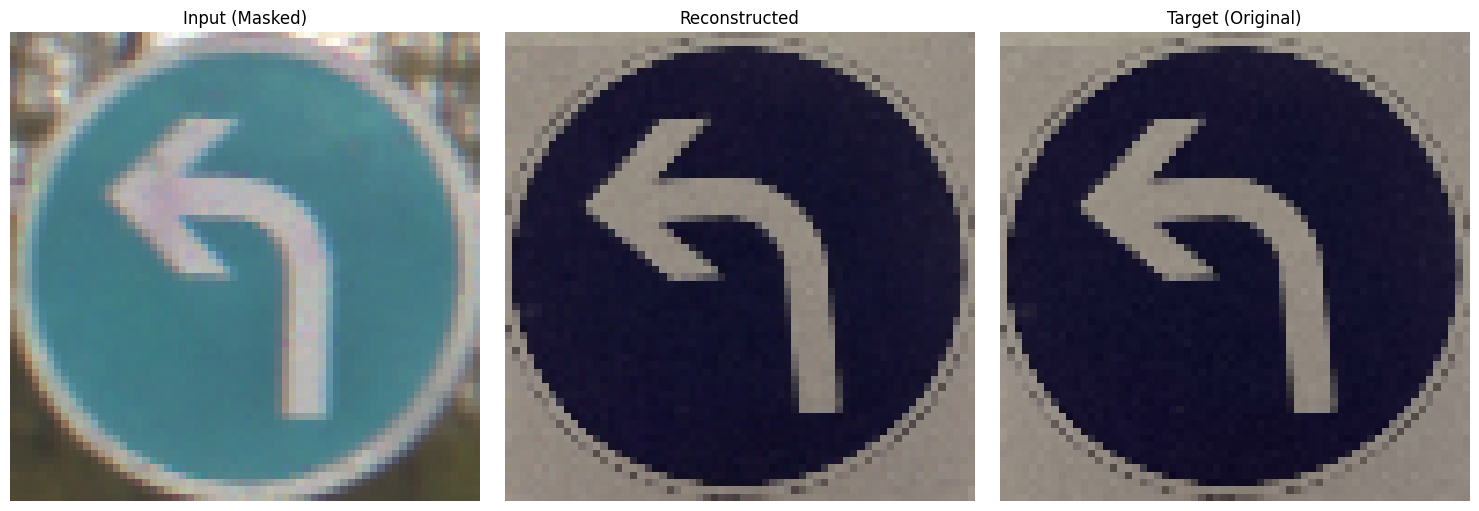

Vergleich für Bild: links_abbiegen/masked_1013.png


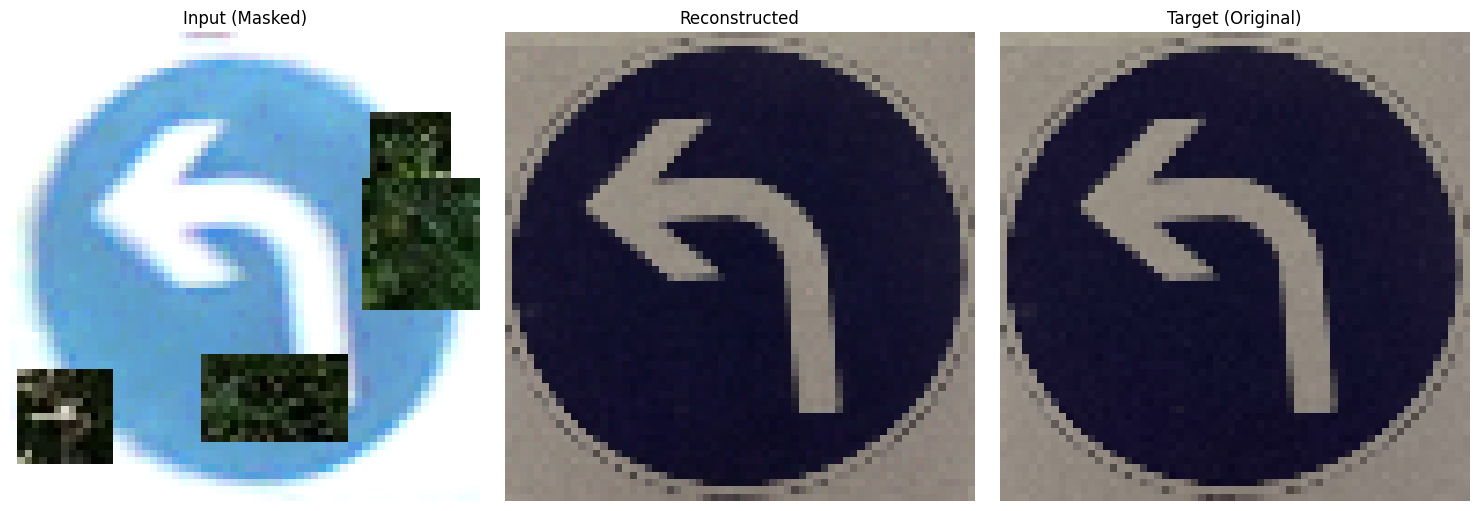

Vergleich für Bild: links_abbiegen/masked_1016.png


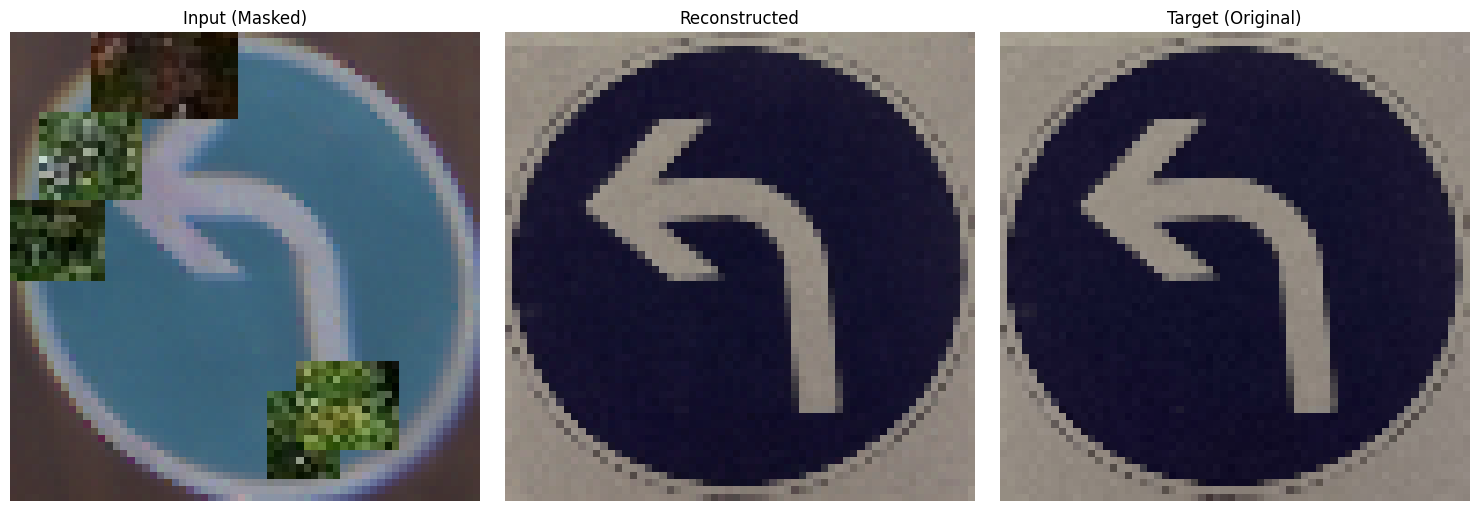

Vergleich für Bild: links_abbiegen/masked_878.png


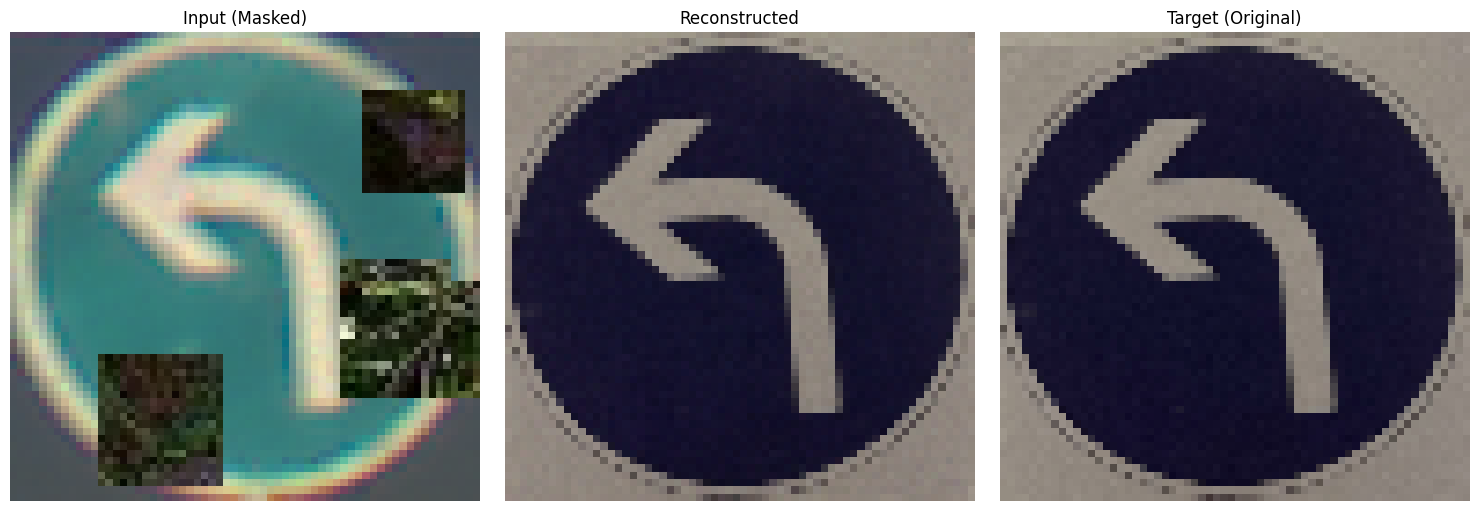

Vergleich für Bild: links_abbiegen/masked_1190.png


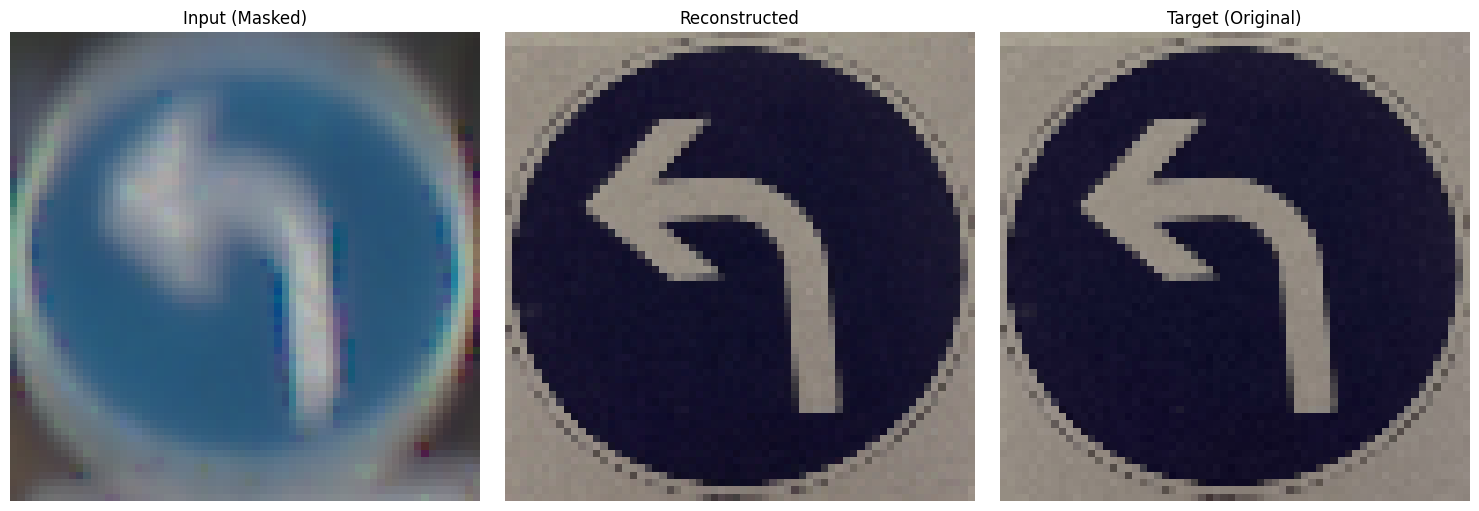

Vergleich für Bild: links_abbiegen/masked_432.png


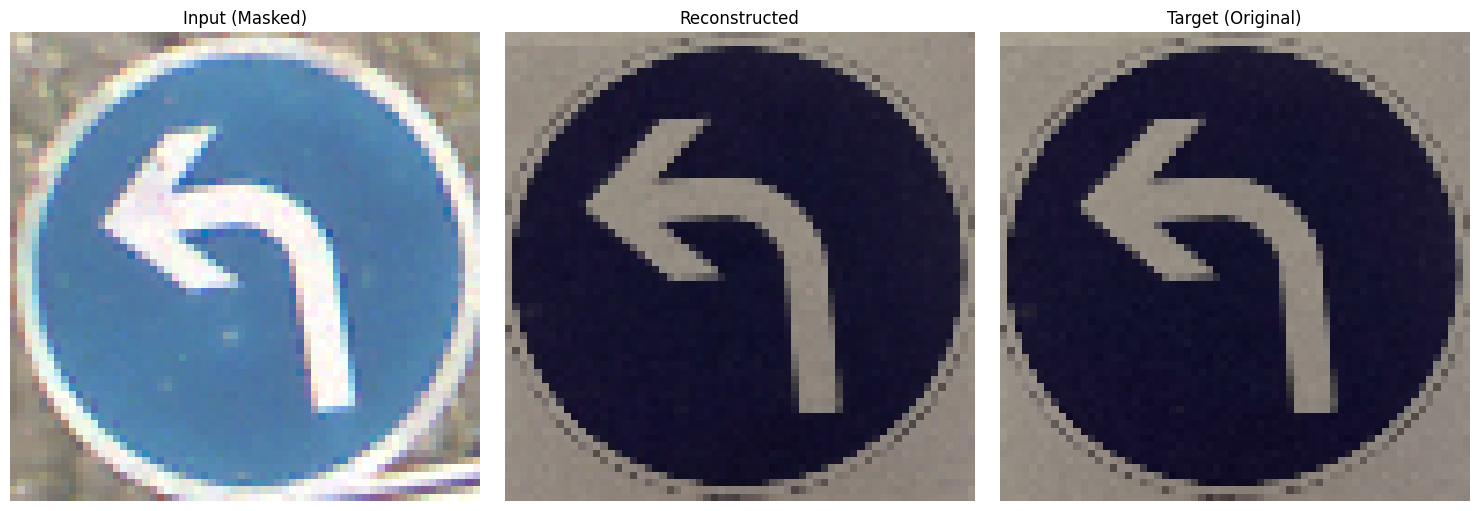

Vergleich für Bild: links_abbiegen/masked_727.png


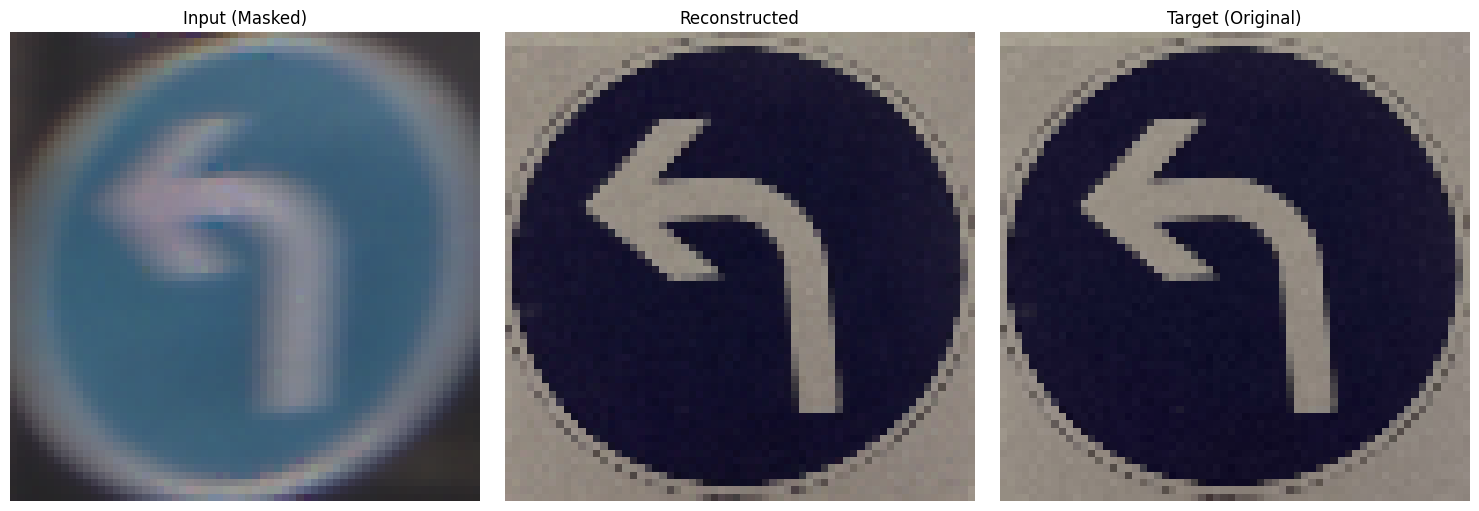

Vergleich für Bild: links_abbiegen/masked_117.png


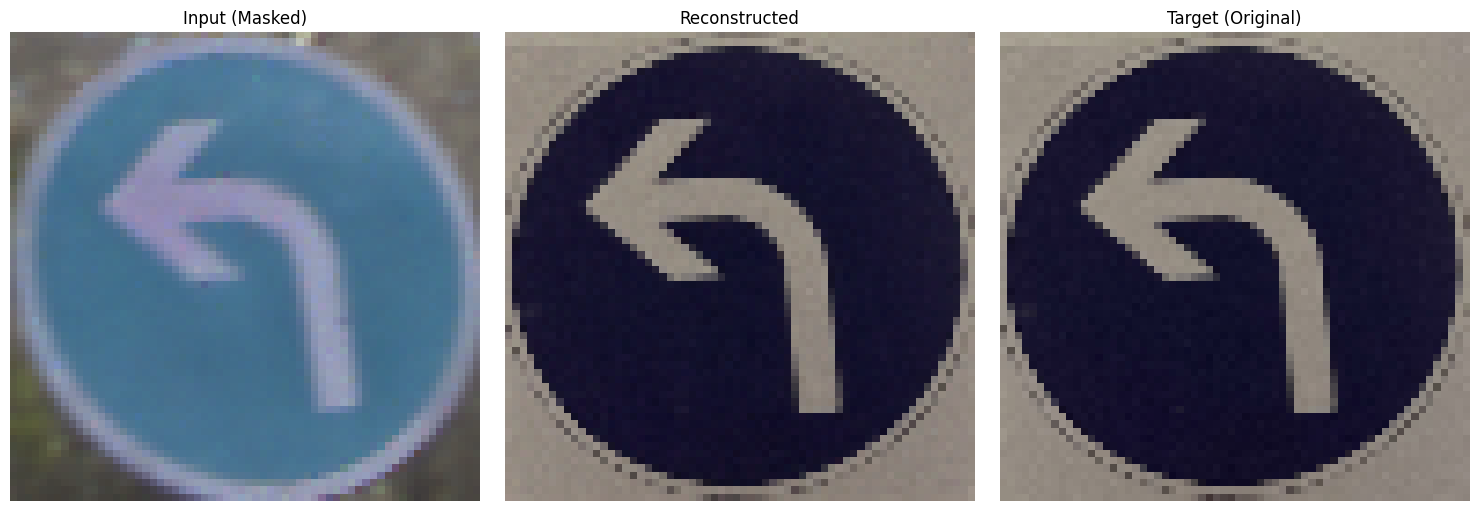

Vergleich für Bild: links_abbiegen/masked_596.png


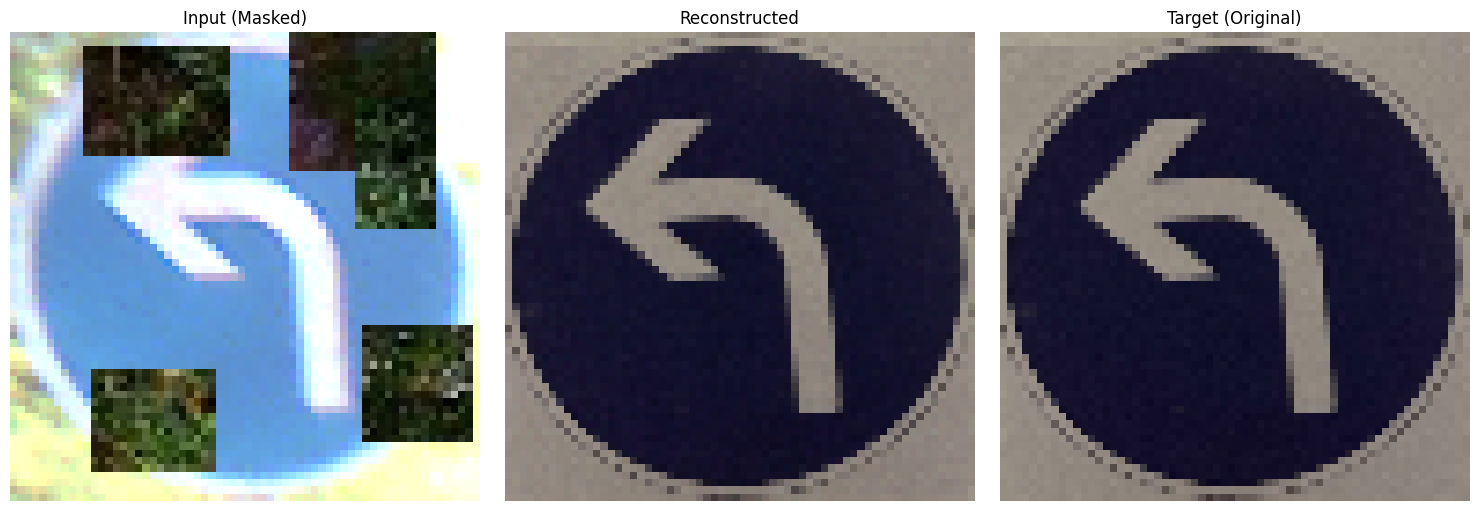

Vergleich für Bild: links_abbiegen/masked_357.png


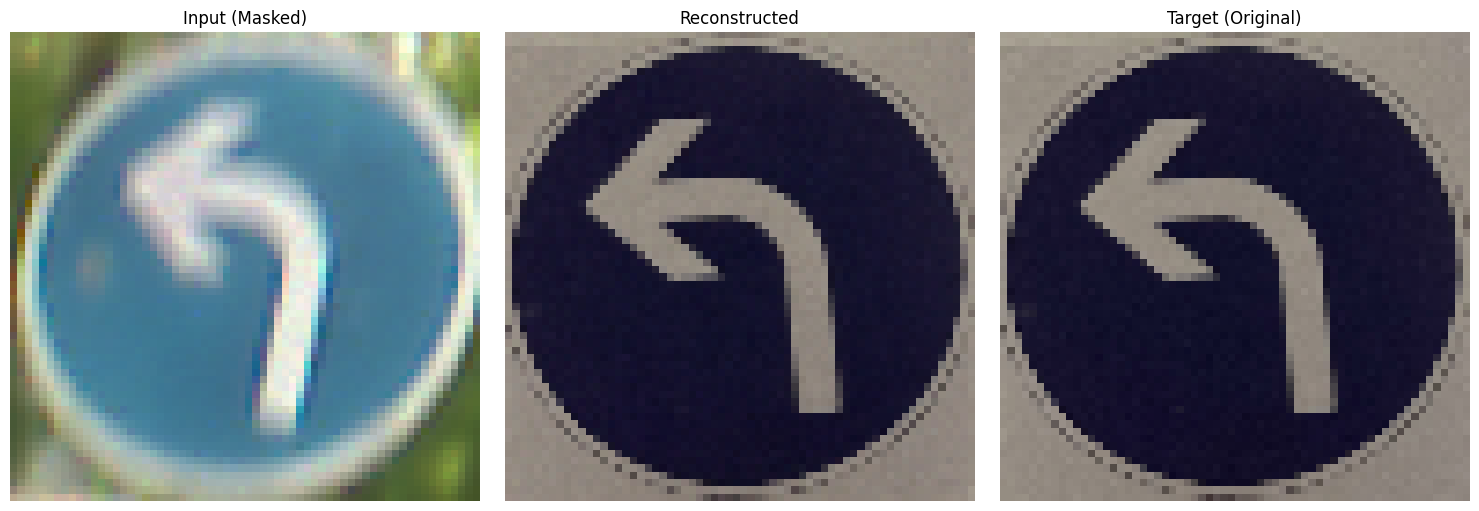

Vergleich für Bild: zebrastreifen/masked_1125.png


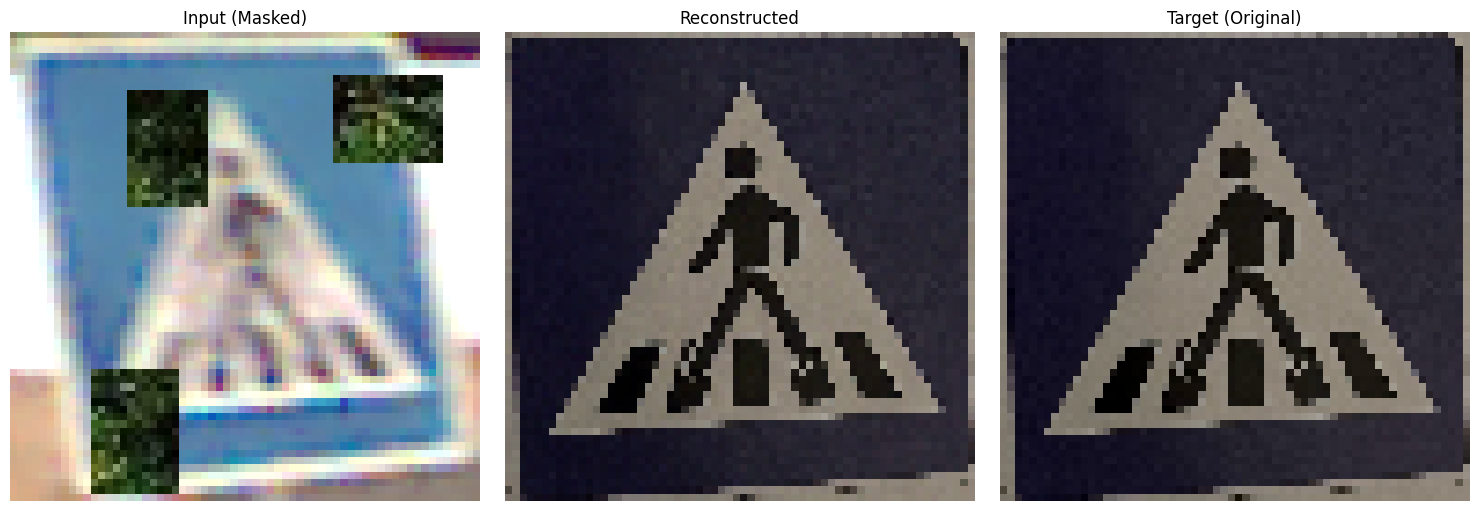

Vergleich für Bild: zebrastreifen/masked_962.png


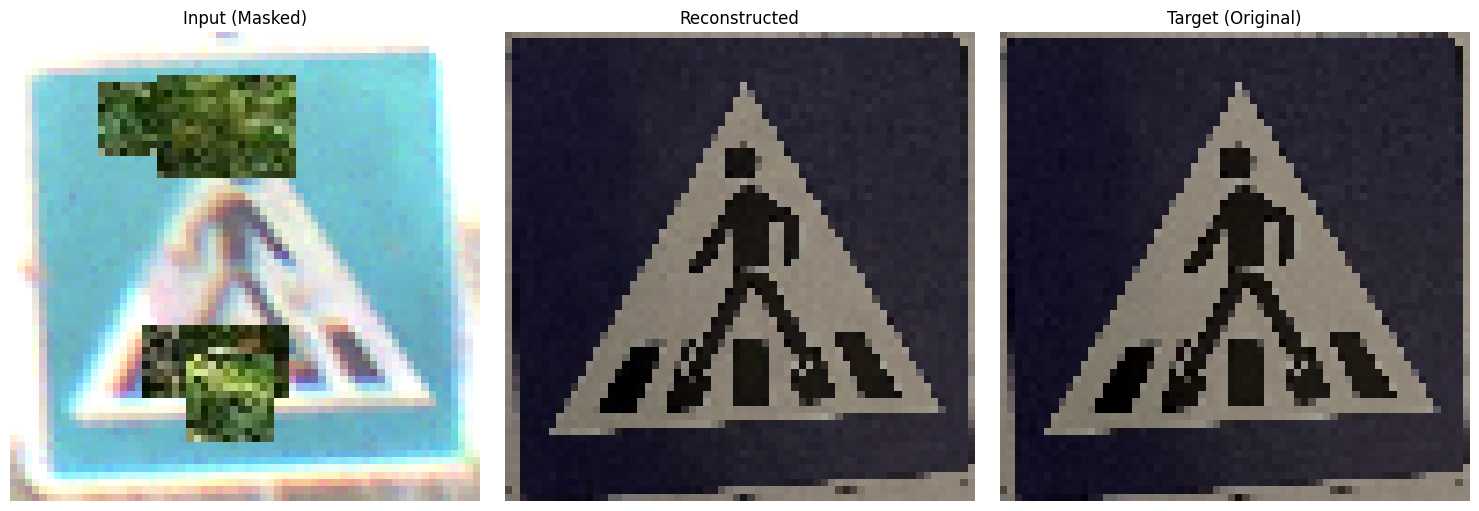

Vergleich für Bild: zebrastreifen/masked_1036.png


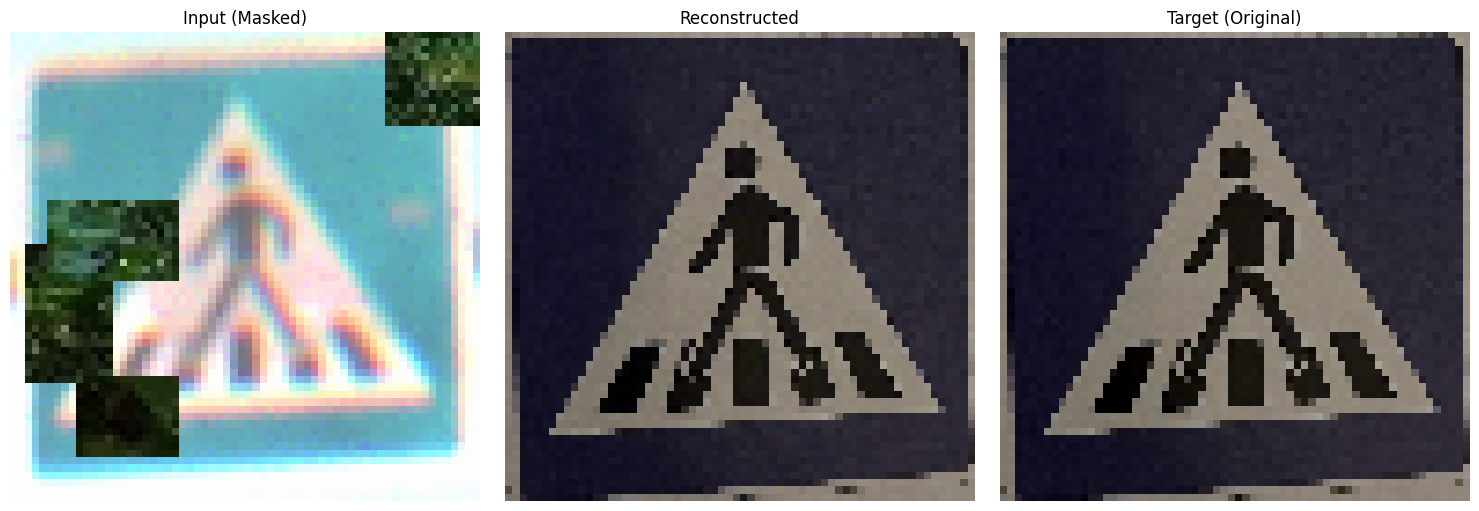

Vergleich für Bild: zebrastreifen/masked_884.png


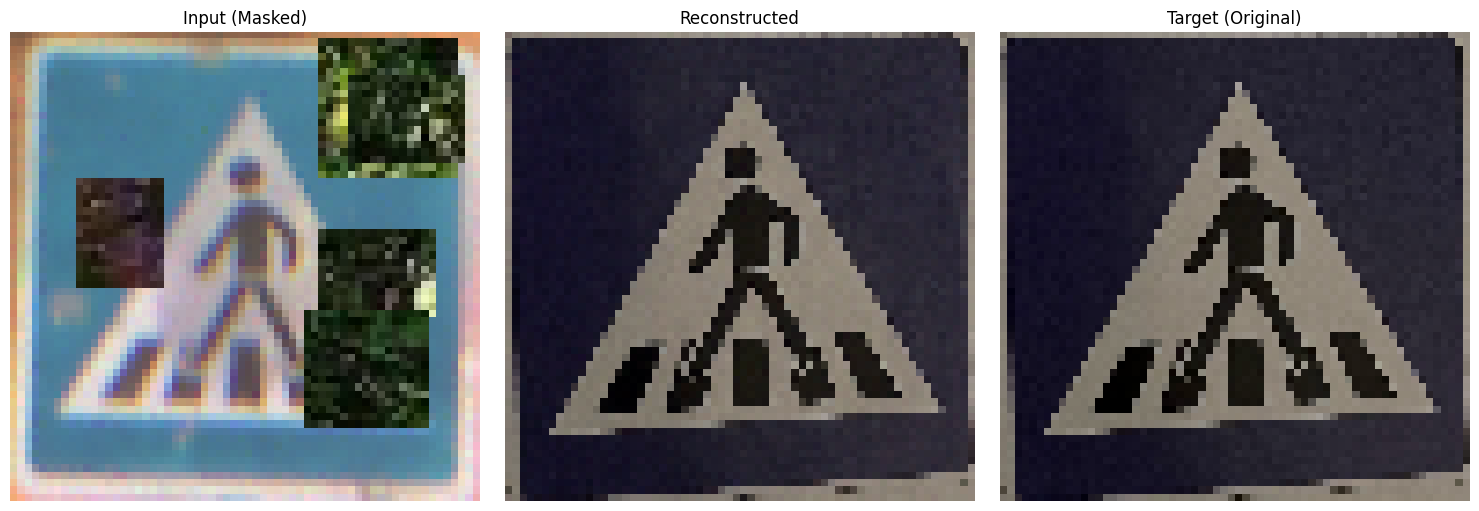

Vergleich für Bild: zebrastreifen/masked_463.png


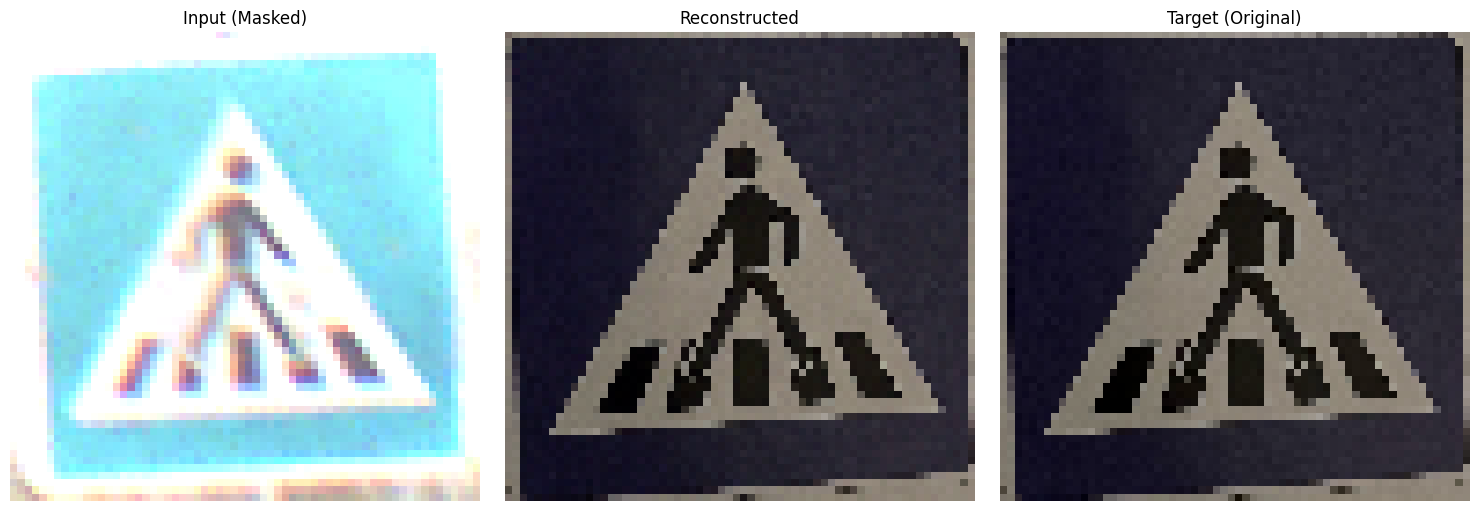

Vergleich für Bild: zebrastreifen/masked_197.png


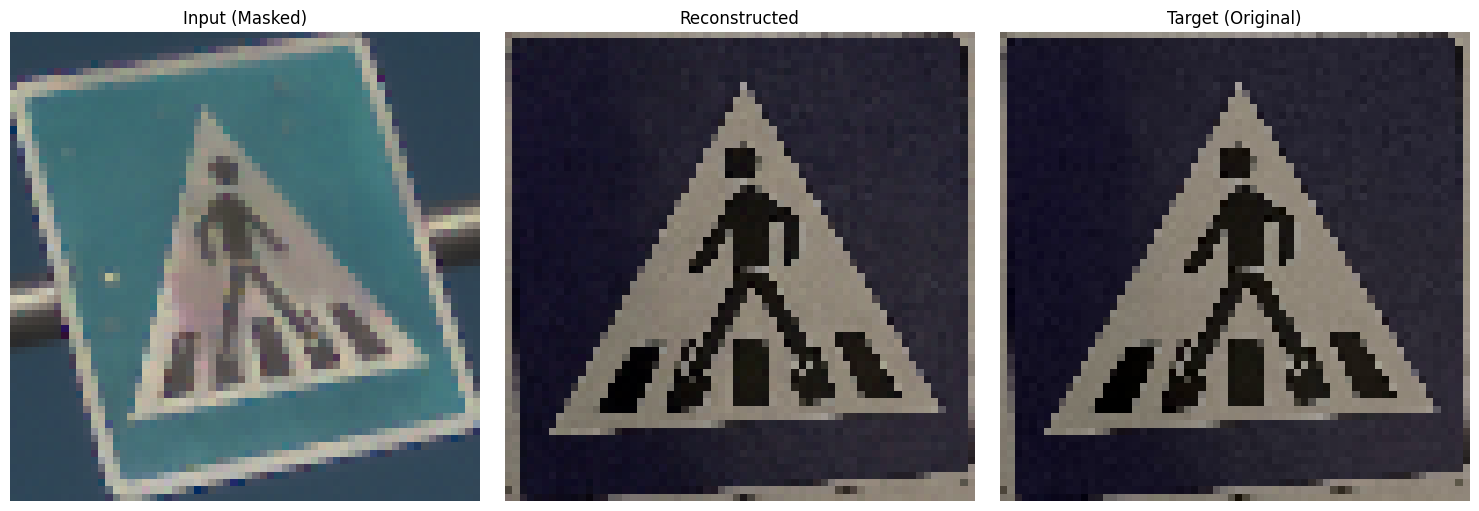

Vergleich für Bild: zebrastreifen/masked_882.png


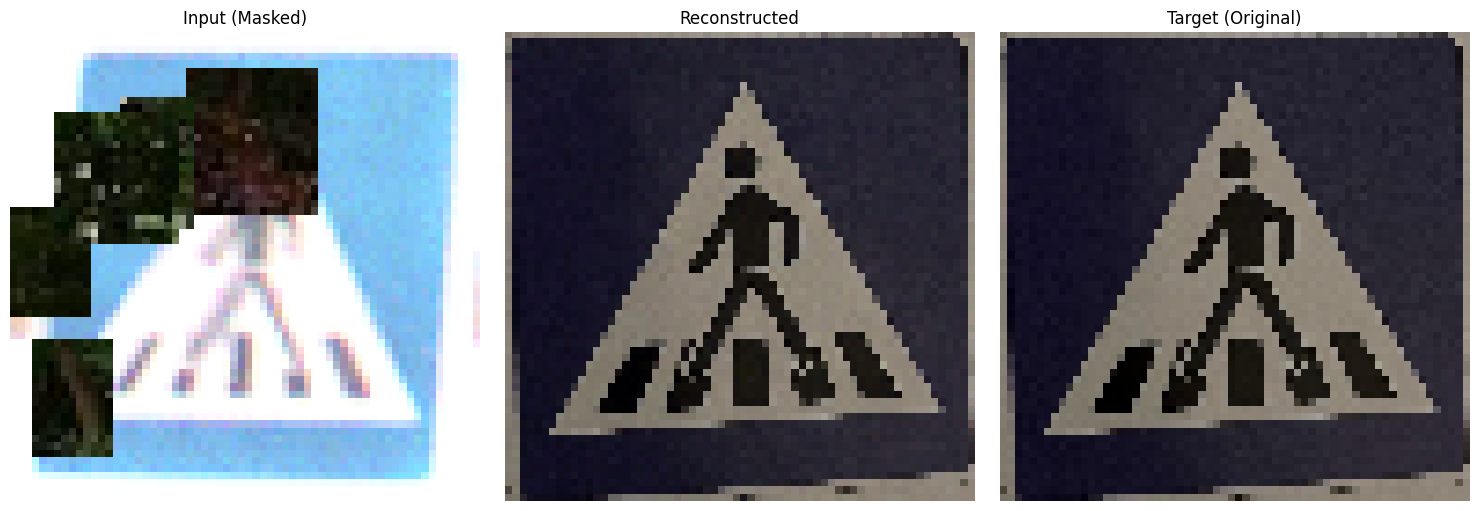

Vergleich für Bild: zebrastreifen/masked_819.png


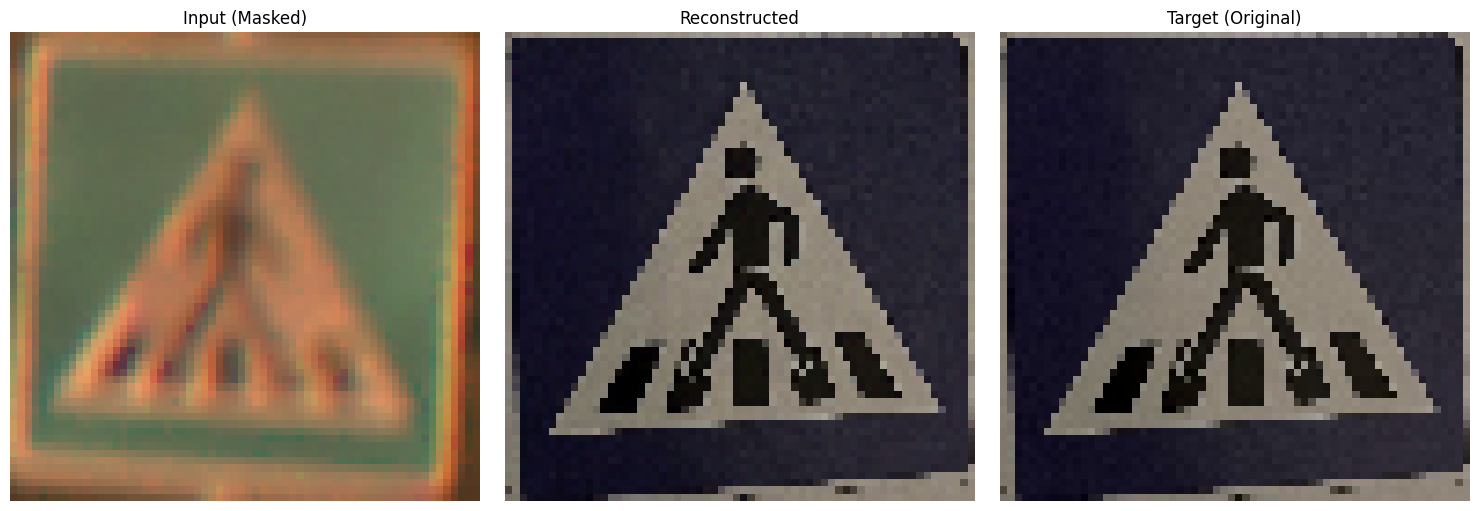

Vergleich für Bild: zebrastreifen/masked_1080.png


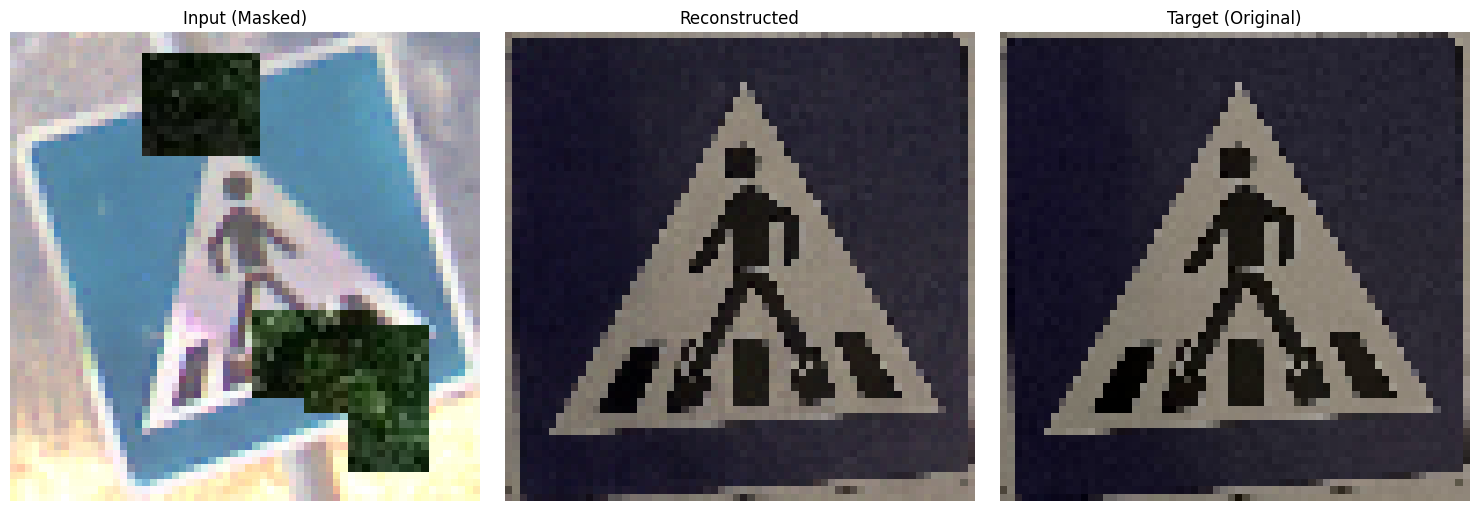

Vergleich für Bild: zebrastreifen/masked_1098.png


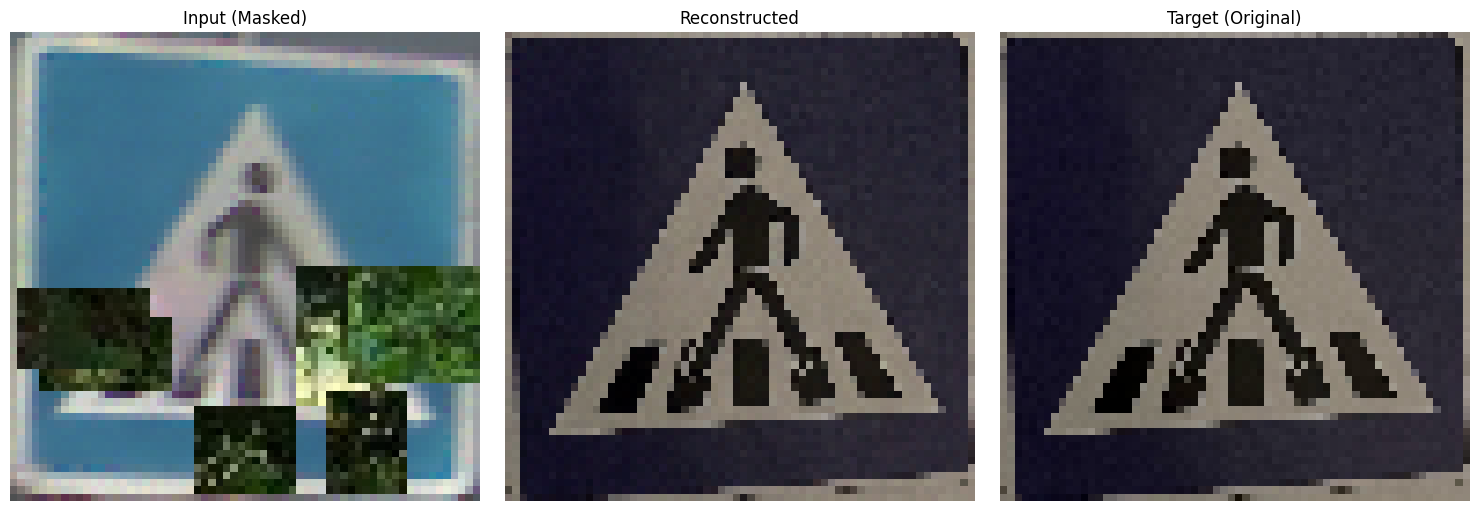

Vergleich für Bild: geradeaus/masked_620.png


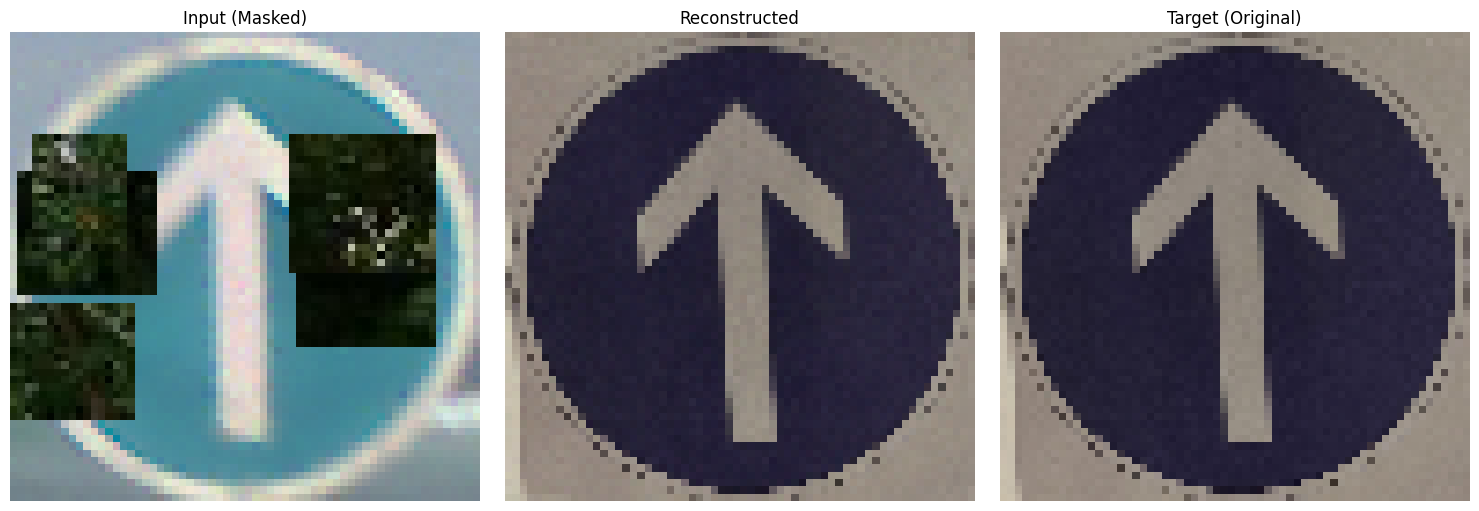

Vergleich für Bild: geradeaus/masked_223.png


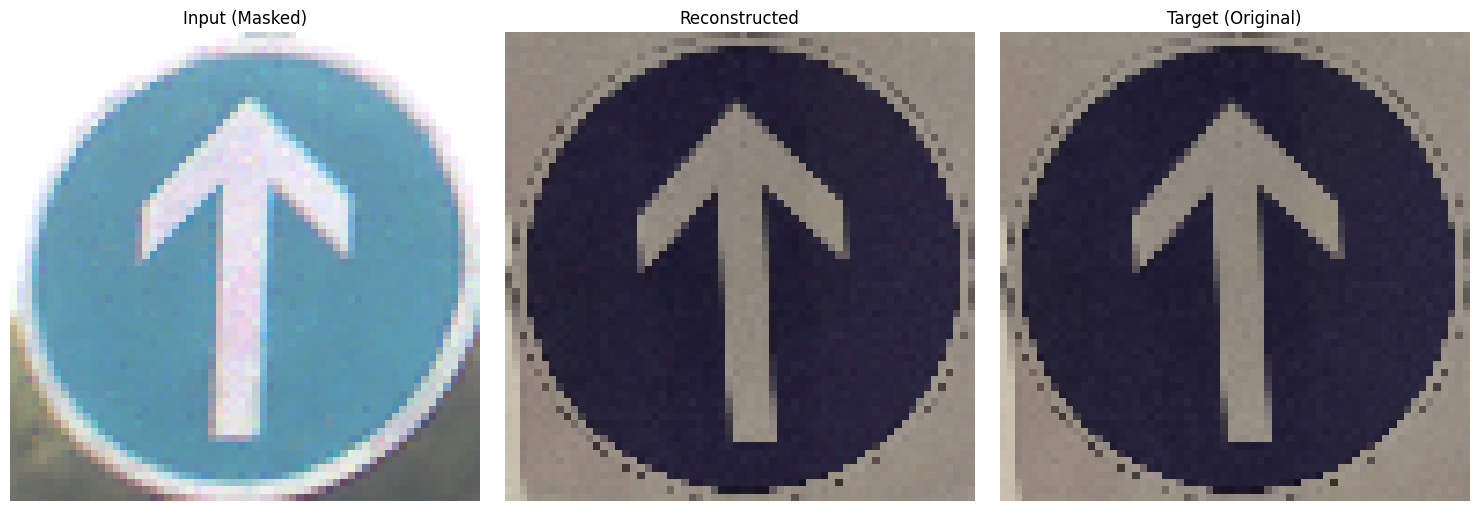

Vergleich für Bild: geradeaus/masked_657.png


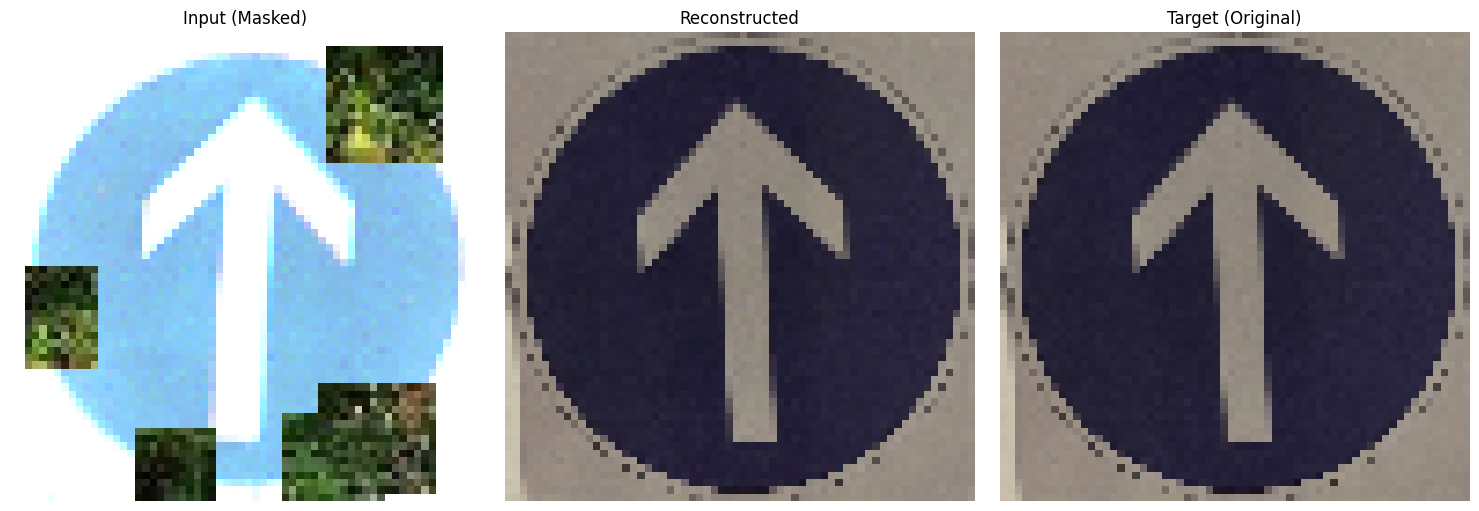

Vergleich für Bild: geradeaus/masked_984.png


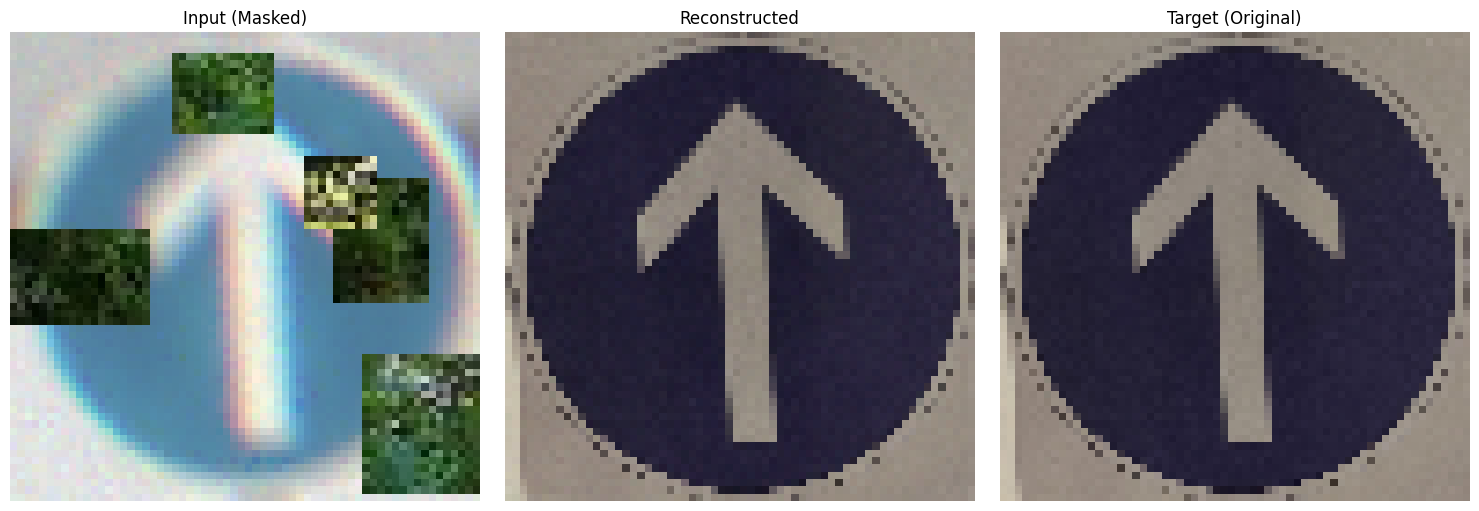

Vergleich für Bild: geradeaus/masked_186.png


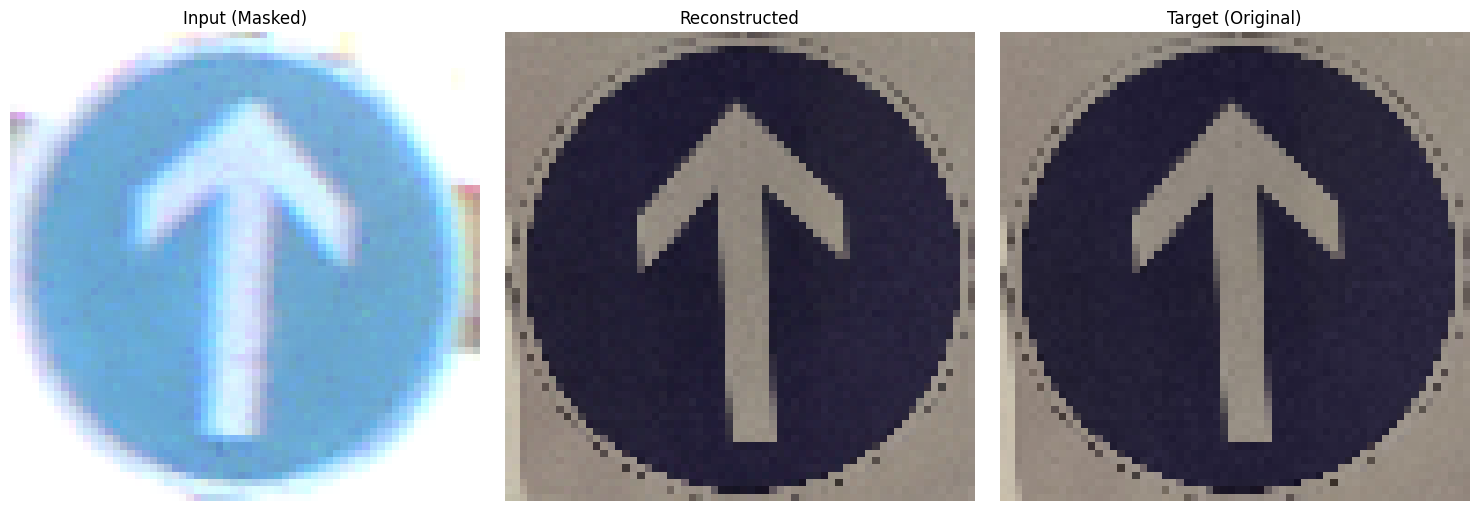

Vergleich für Bild: geradeaus/masked_149.png


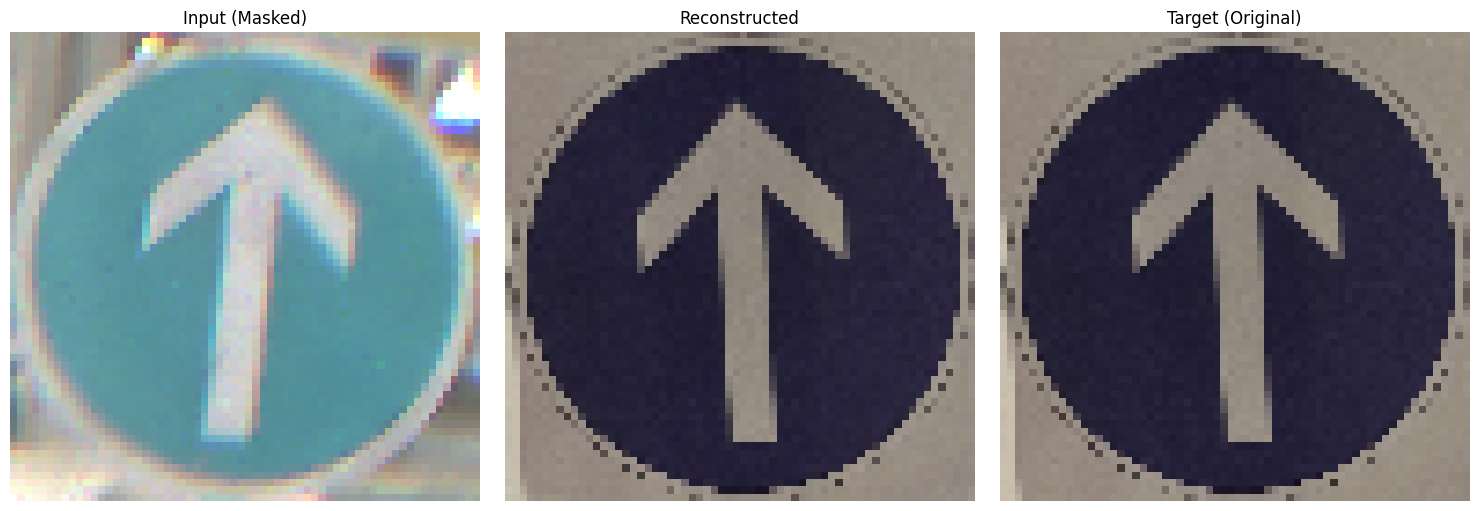

Vergleich für Bild: geradeaus/masked_797.png


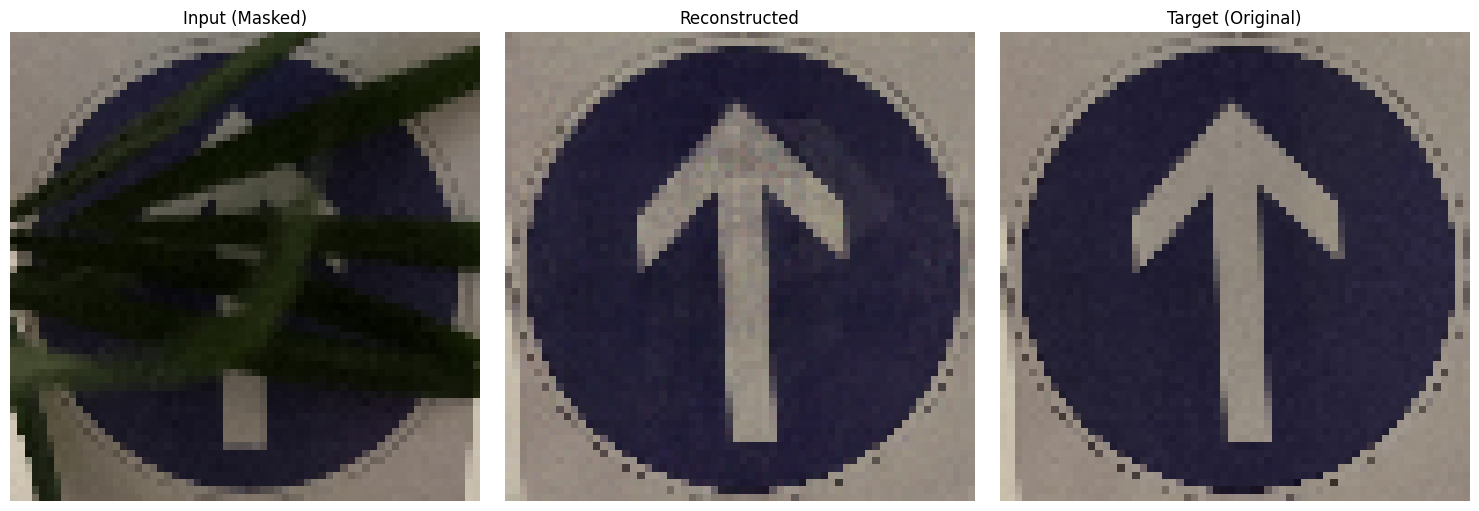

Vergleich für Bild: geradeaus/masked_1058.png


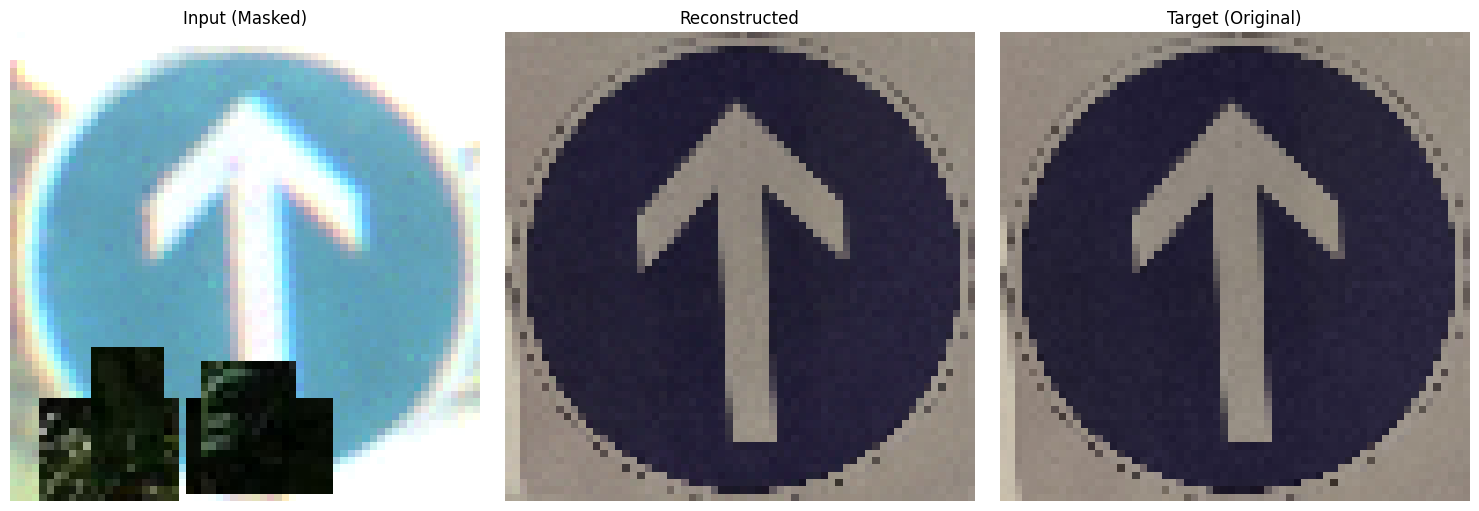

Vergleich für Bild: geradeaus/masked_980.png


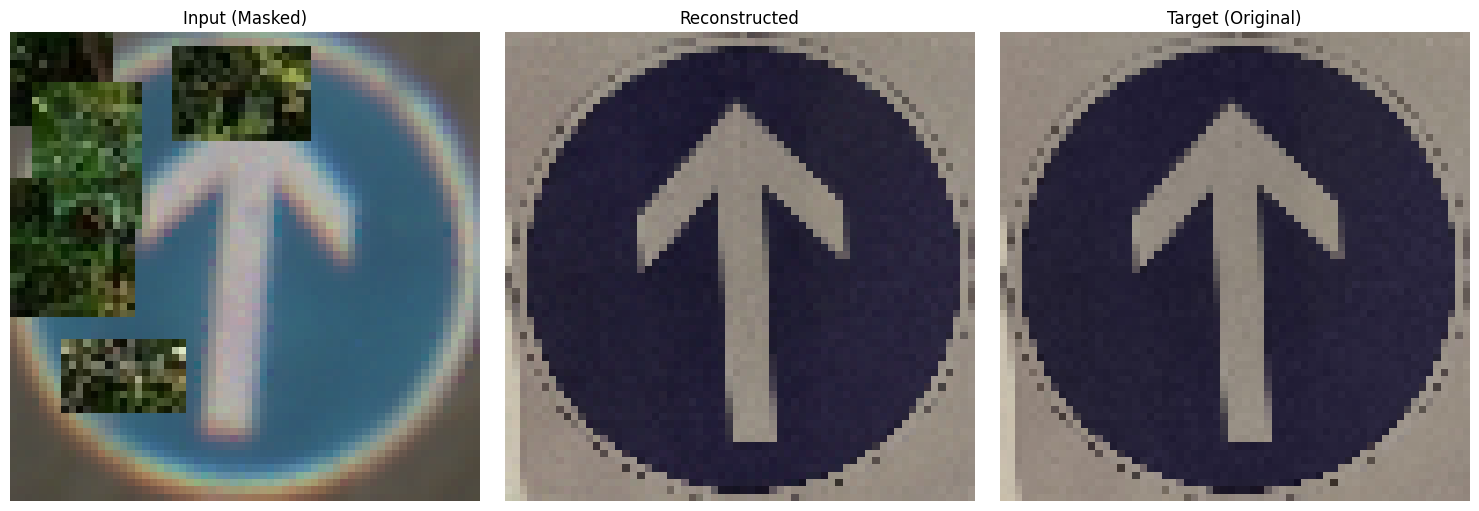

Vergleich für Bild: geradeaus/masked_507.png


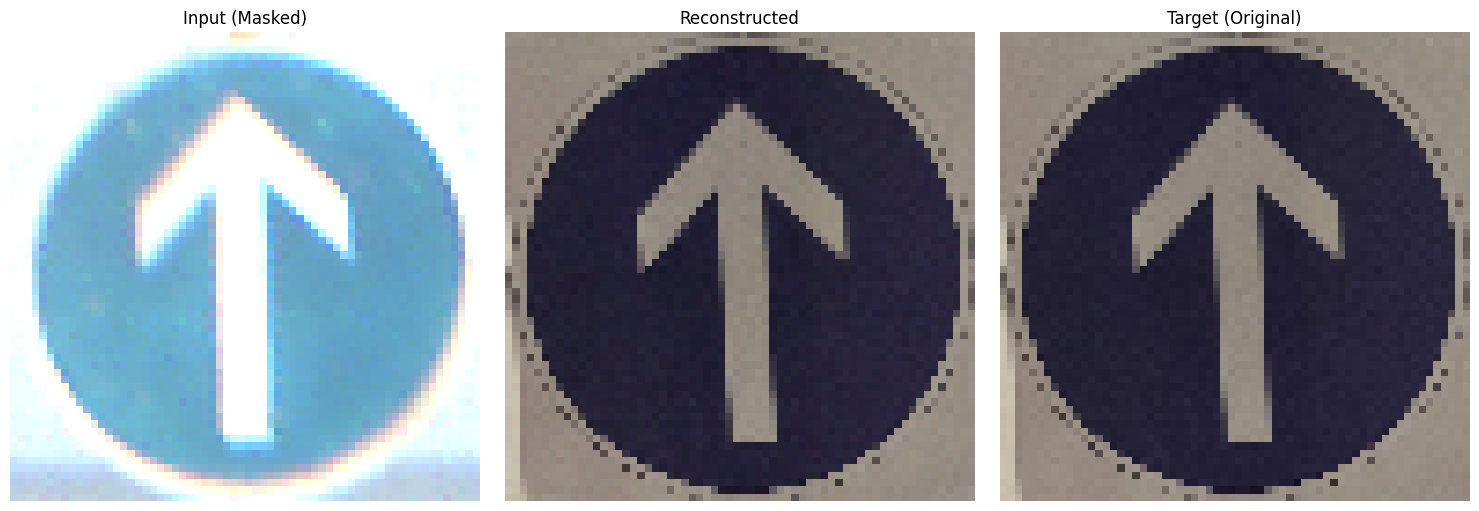

Vergleich für Bild: geradeaus_links/masked_169.png


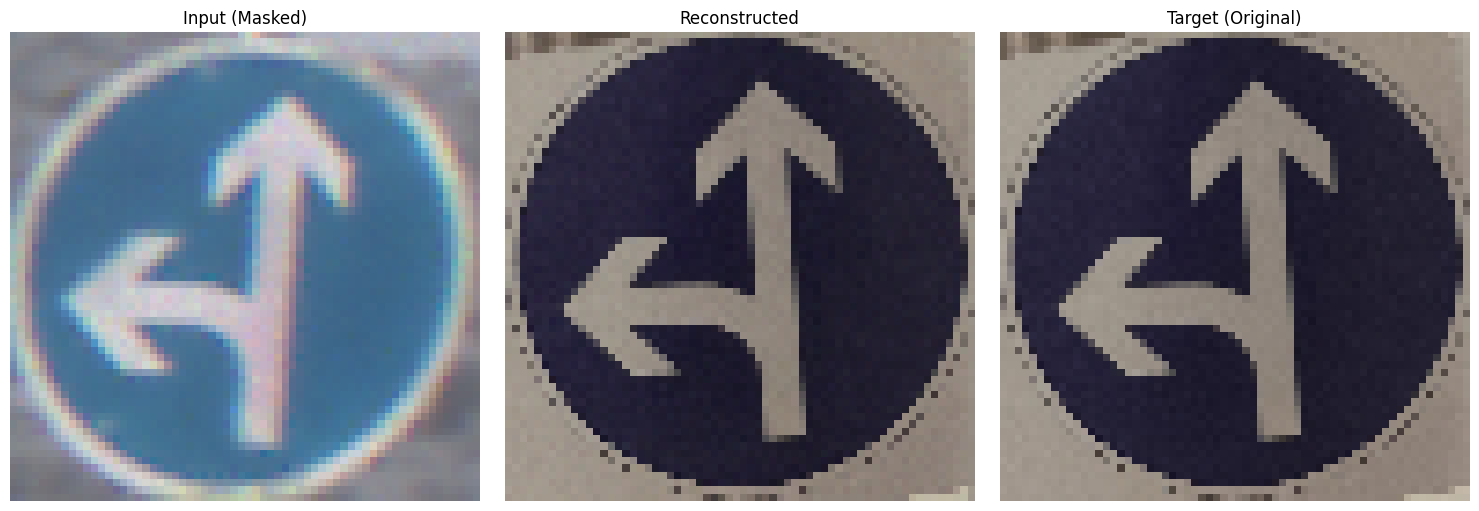

Vergleich für Bild: geradeaus_links/masked_838.png


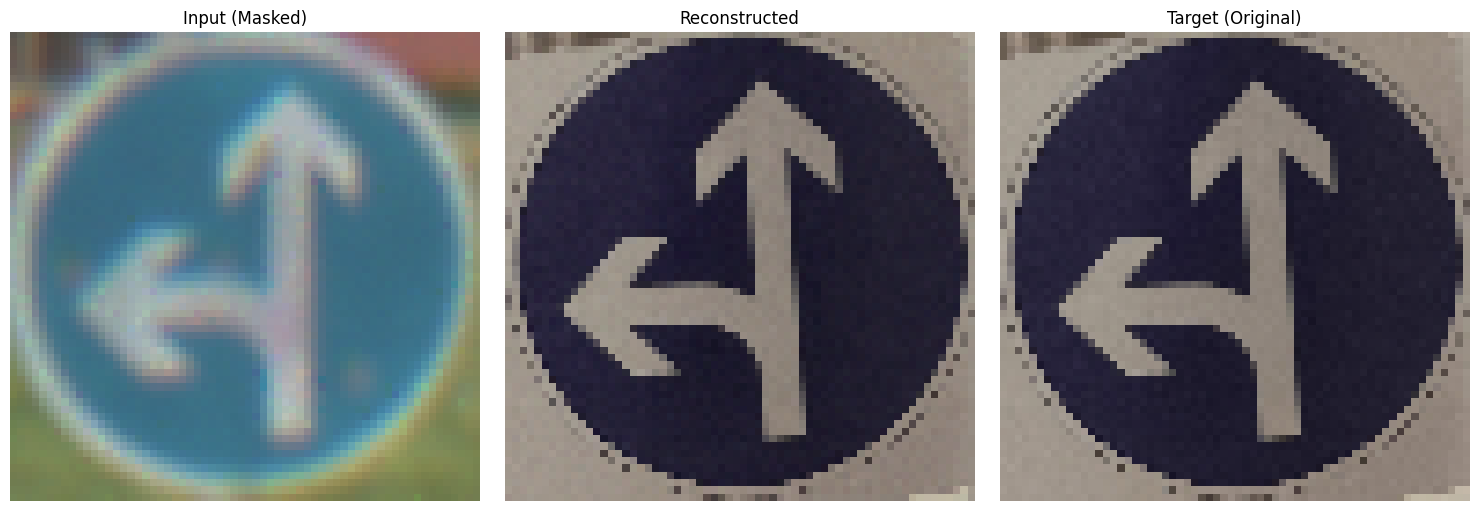

Vergleich für Bild: geradeaus_links/masked_90.png


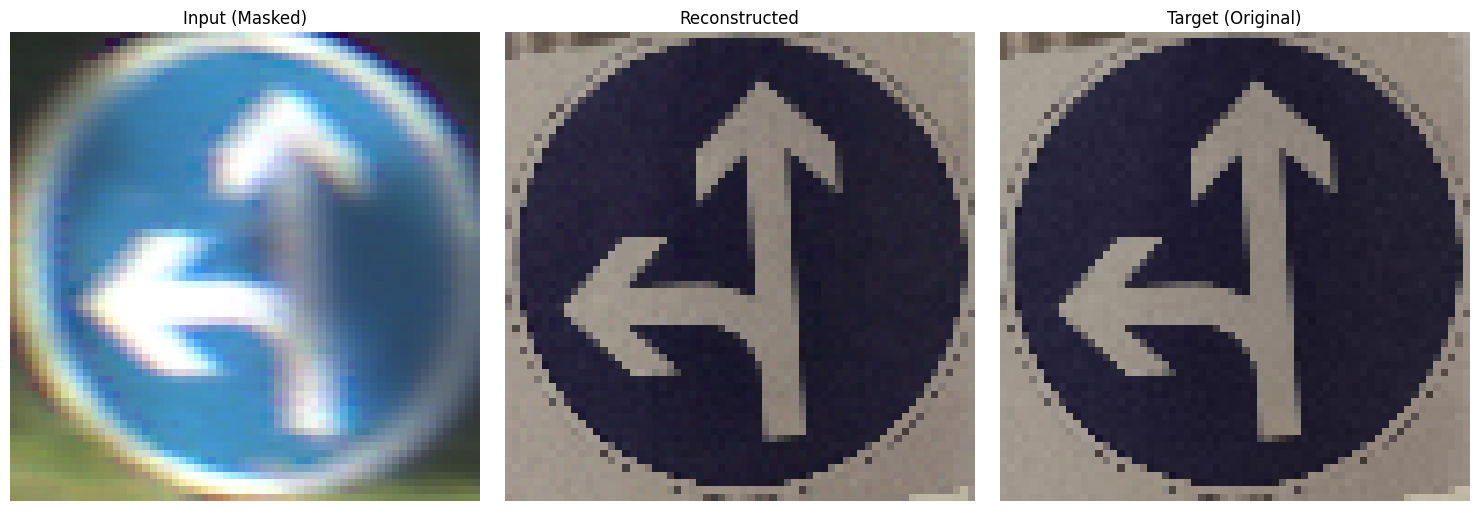

Vergleich für Bild: geradeaus_links/masked_652.png


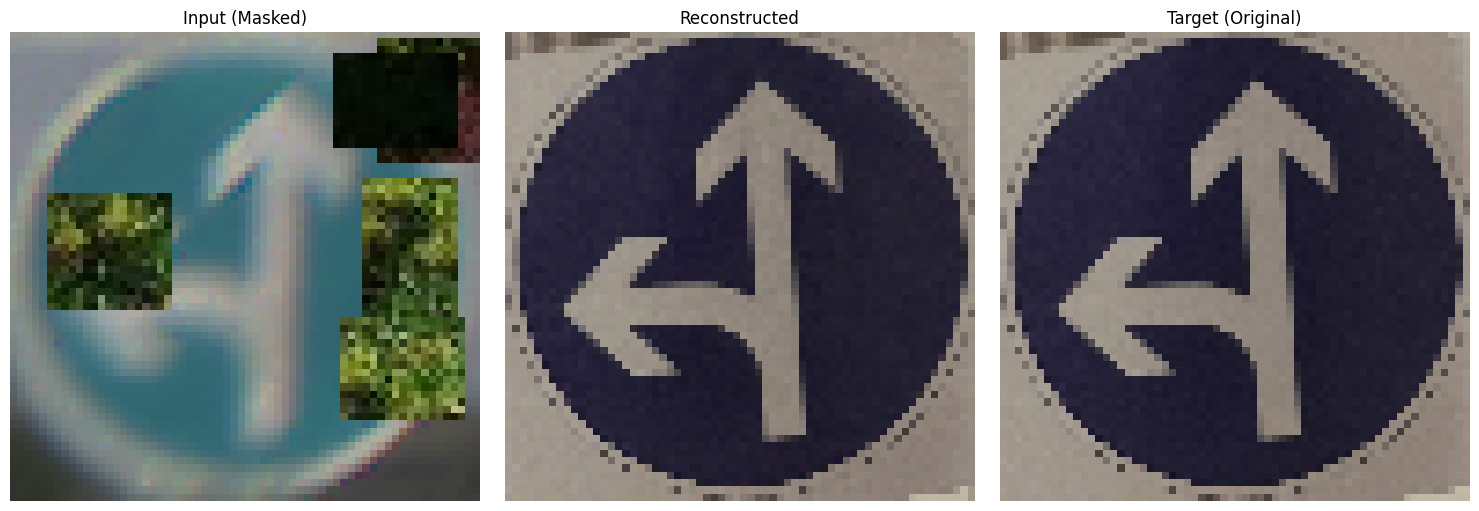

Vergleich für Bild: geradeaus_links/masked_669.png


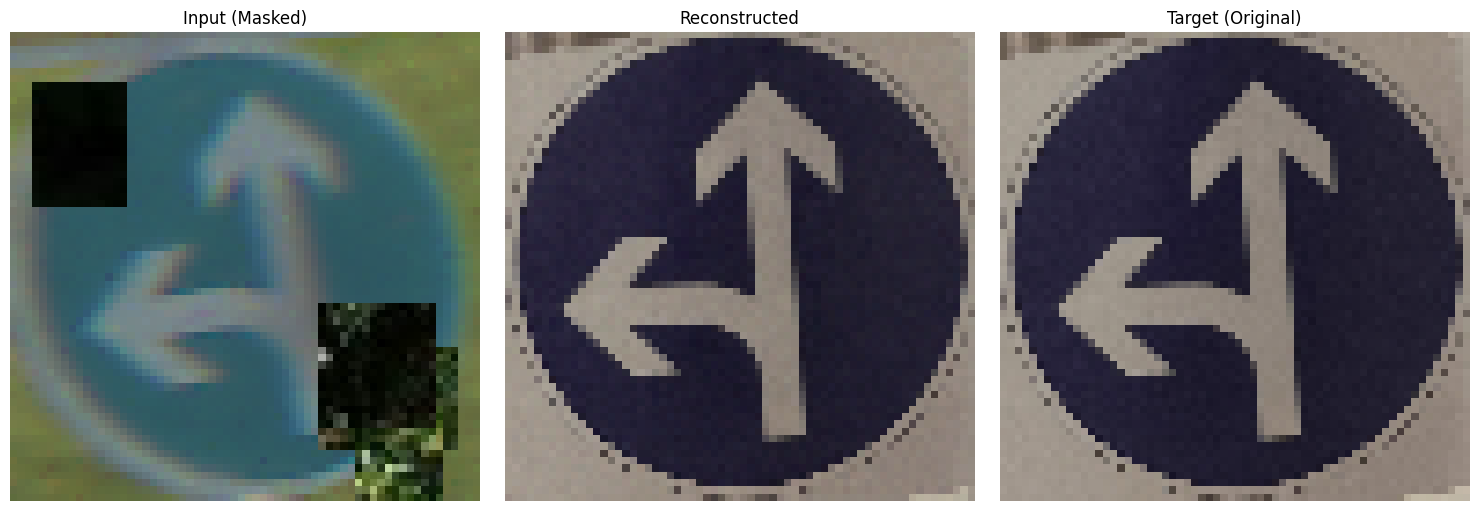

Vergleich für Bild: geradeaus_links/masked_809.png


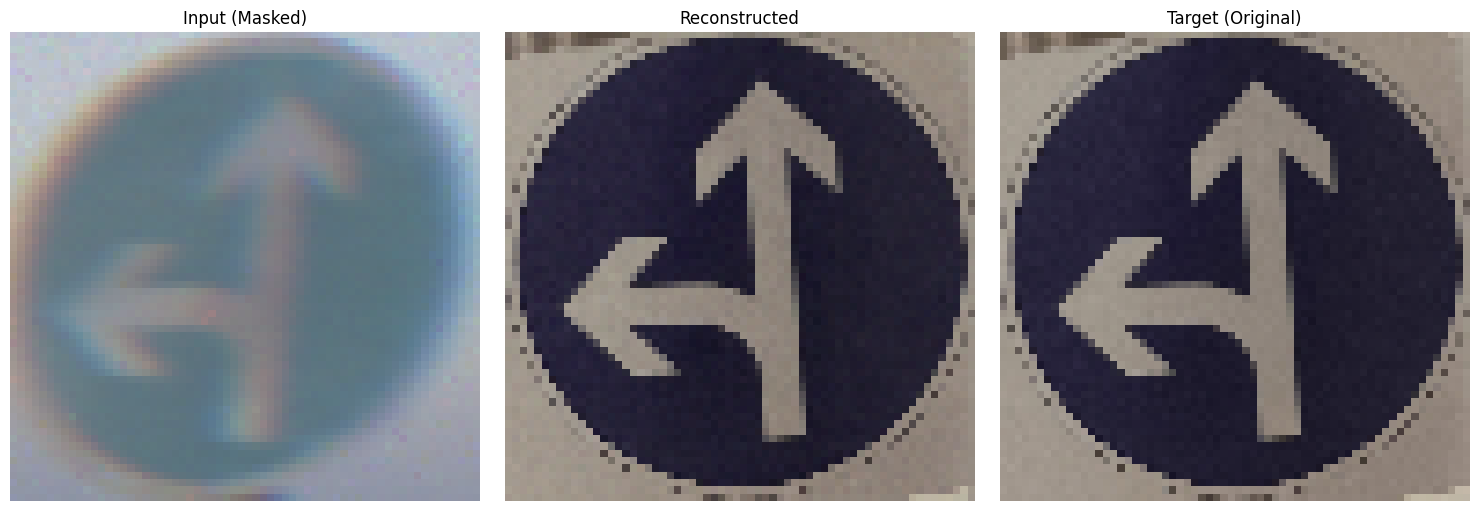

Vergleich für Bild: geradeaus_links/masked_644.png


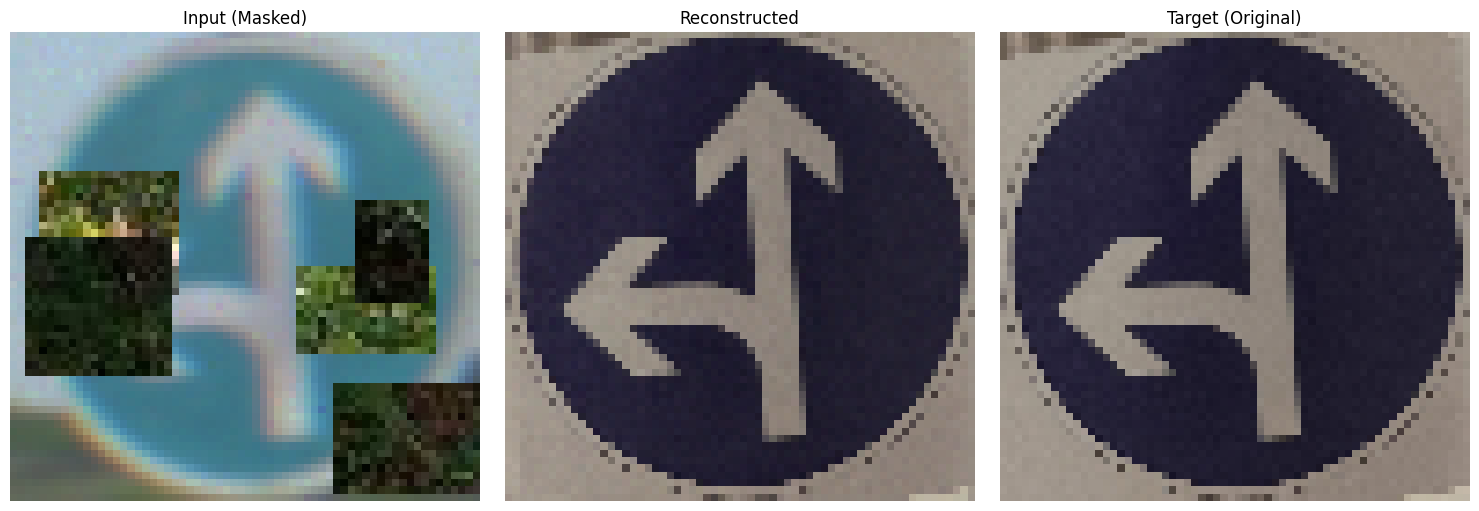

Vergleich für Bild: geradeaus_links/masked_799.png


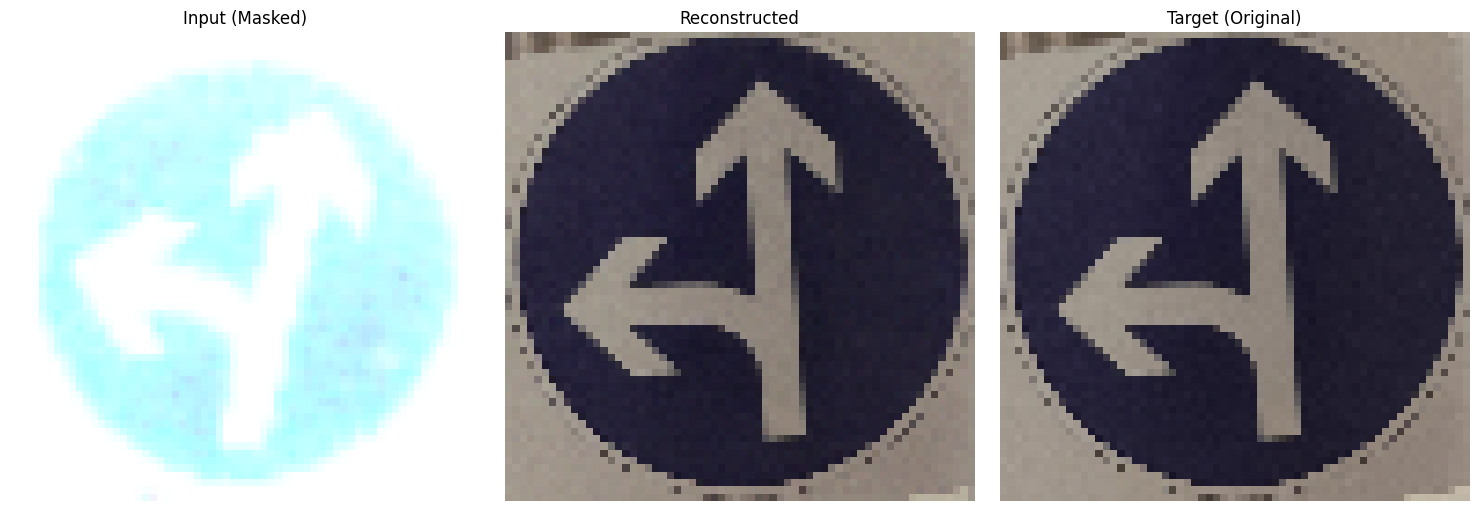

Vergleich für Bild: geradeaus_links/masked_607.png


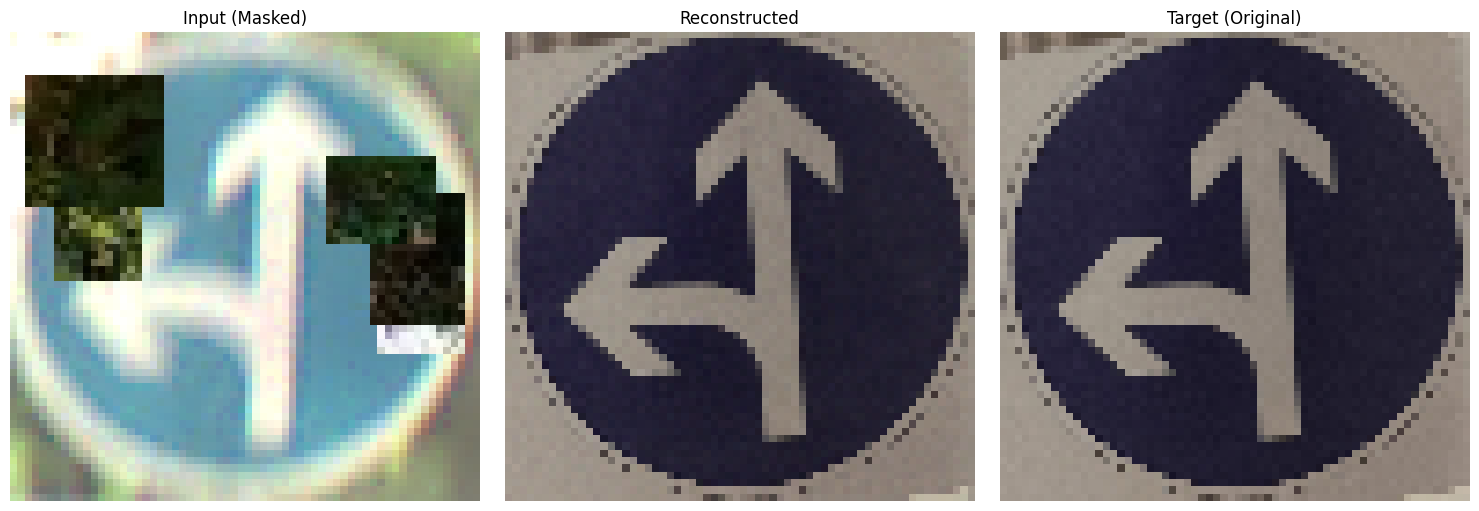

Vergleich für Bild: geradeaus_links/masked_1164.png


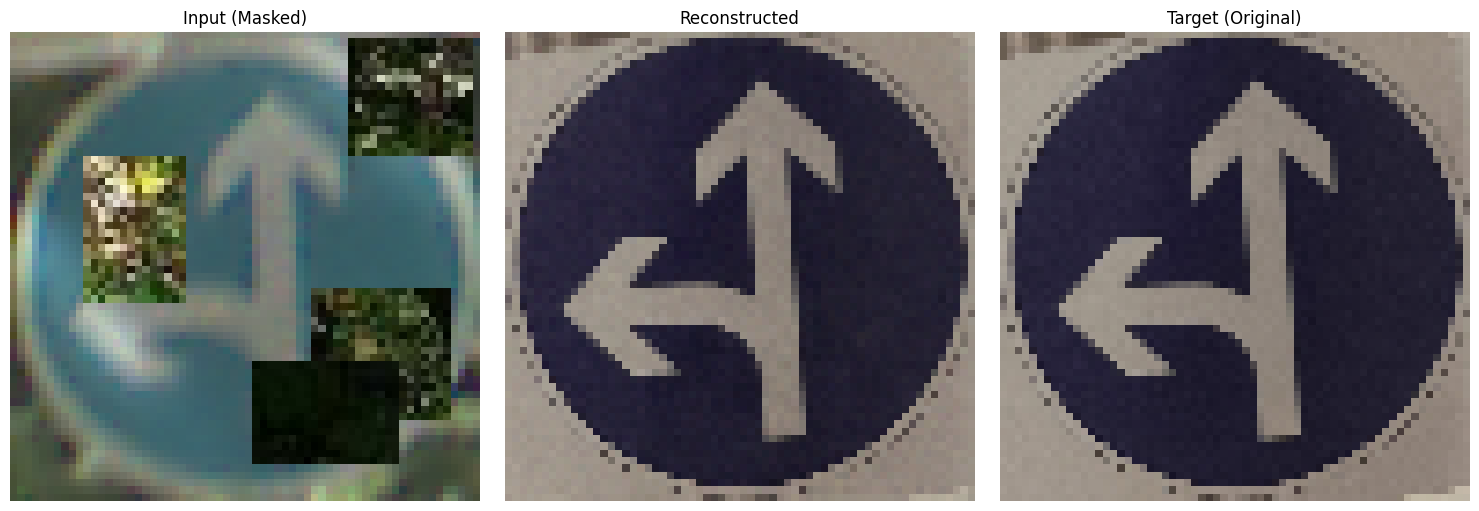

Vergleich für Bild: rechts_abbiegen/masked_792.png


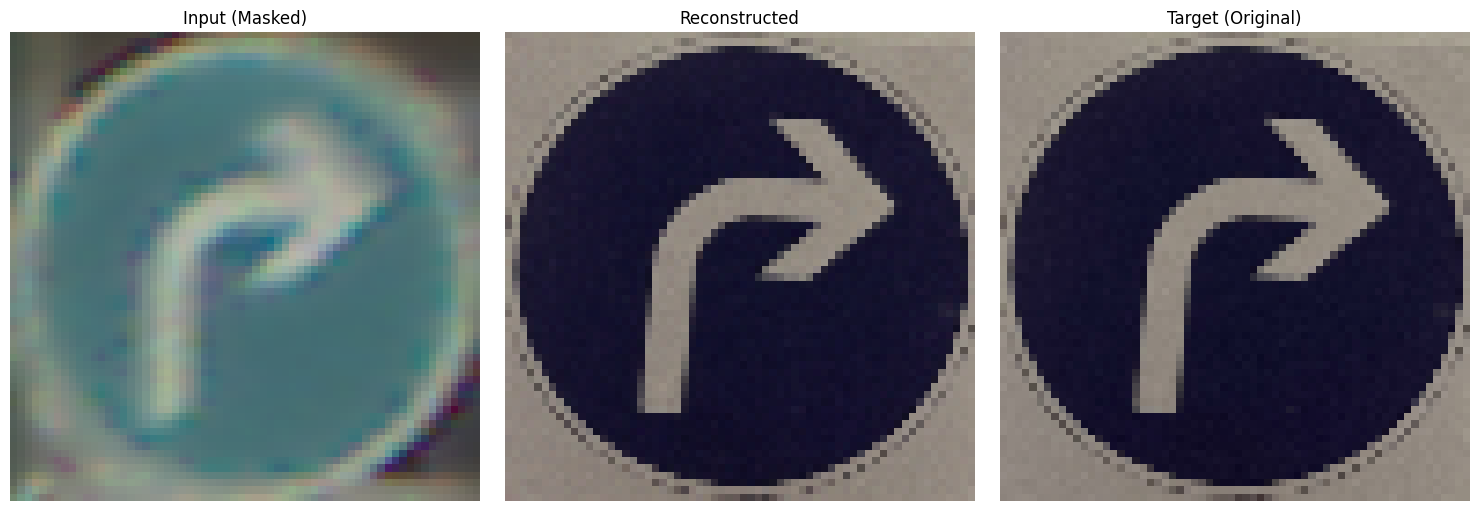

Vergleich für Bild: rechts_abbiegen/masked_226.png


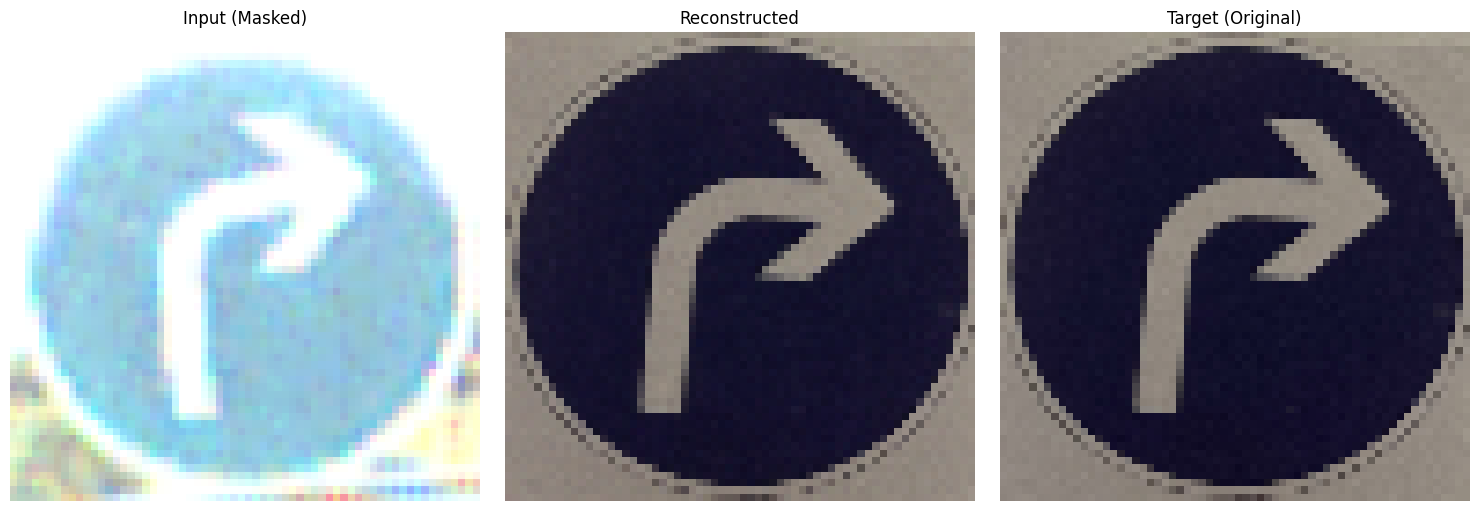

Vergleich für Bild: rechts_abbiegen/masked_866.png


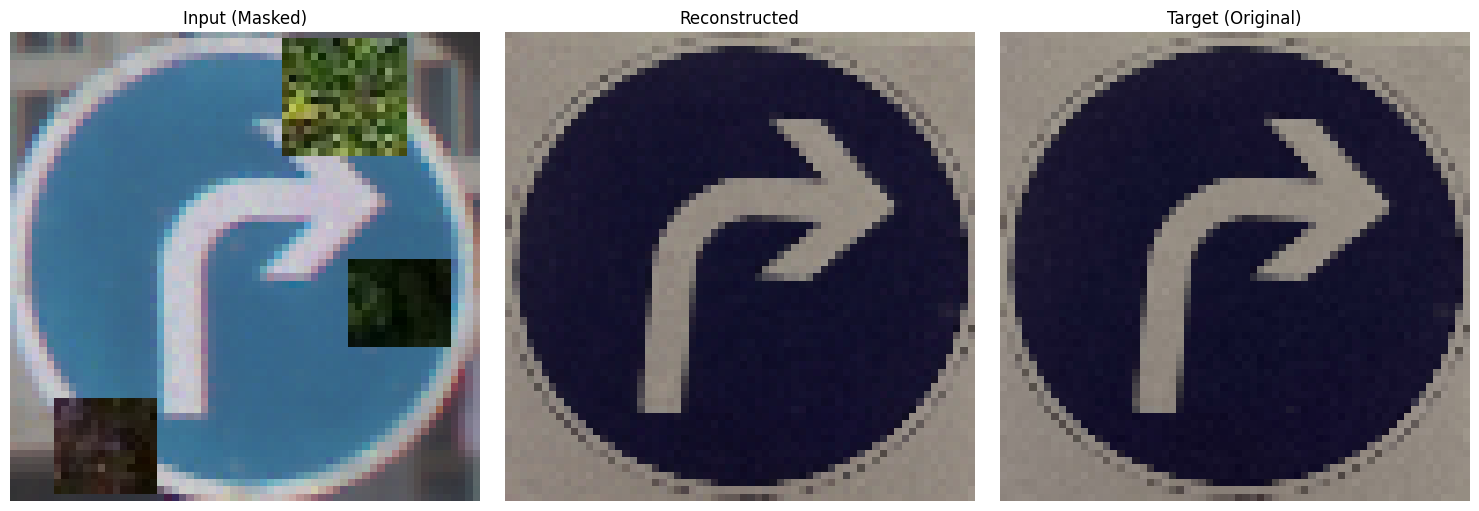

Vergleich für Bild: rechts_abbiegen/masked_1174.png


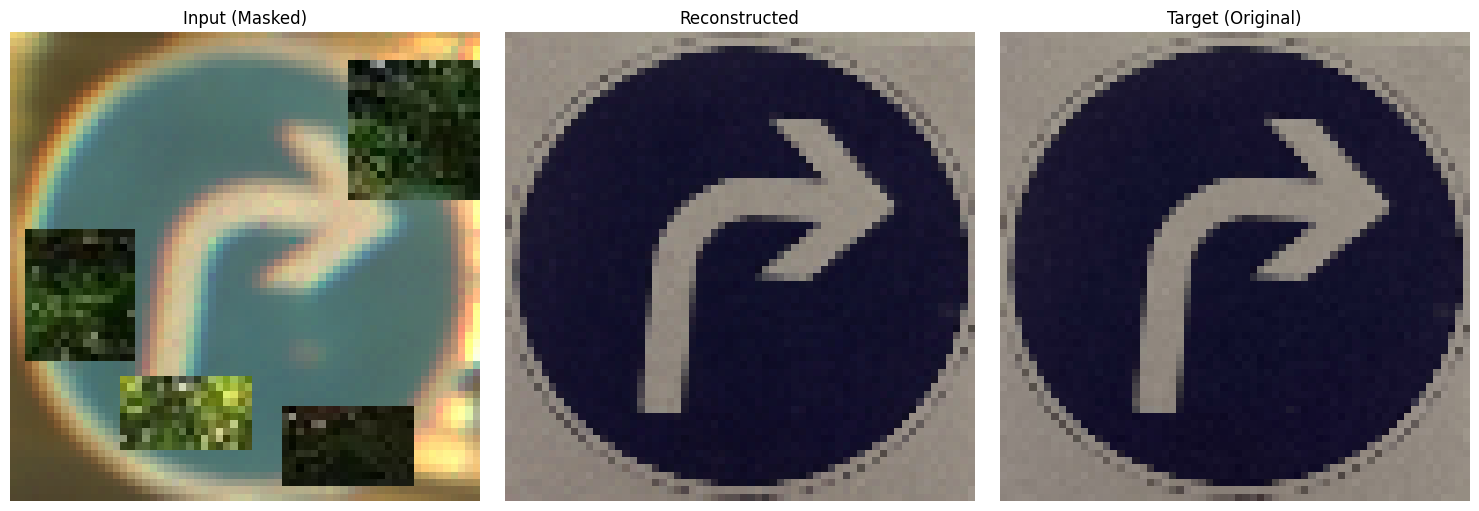

Vergleich für Bild: rechts_abbiegen/masked_664.png


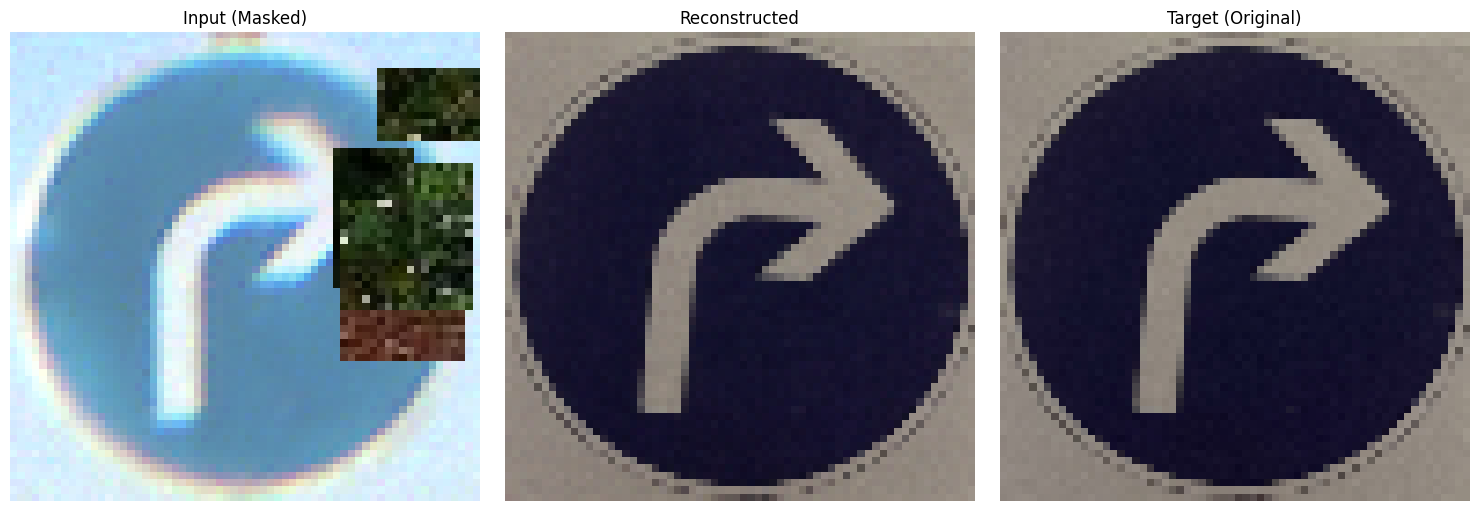

Vergleich für Bild: rechts_abbiegen/masked_1060.png


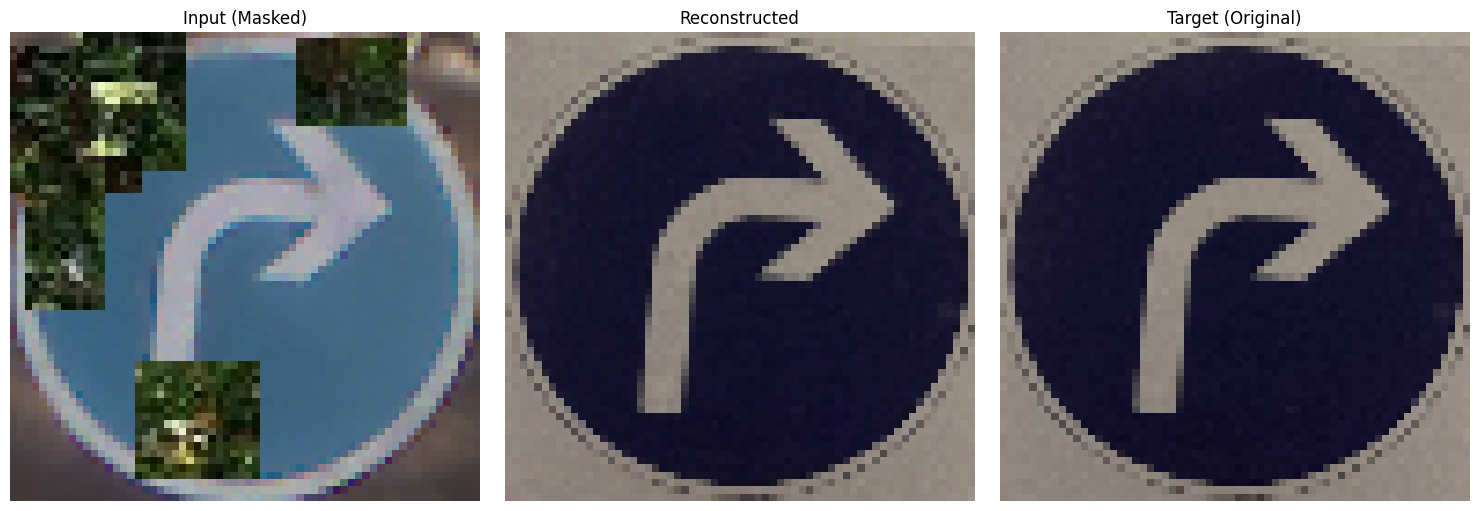

Vergleich für Bild: rechts_abbiegen/masked_624.png


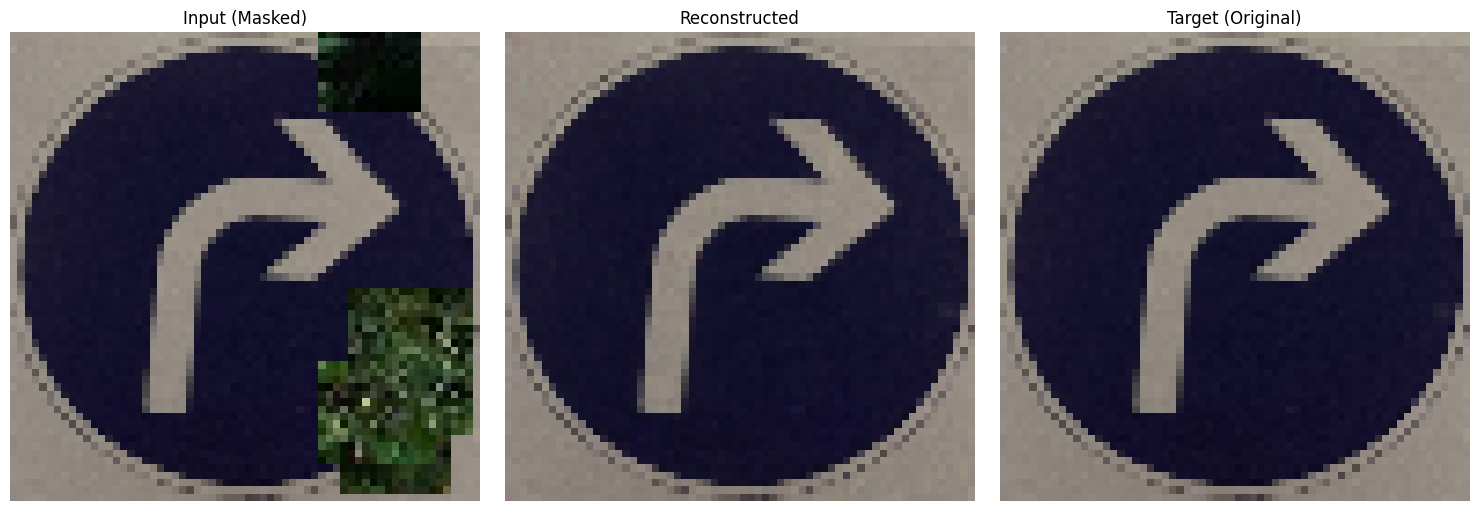

Vergleich für Bild: rechts_abbiegen/masked_374.png


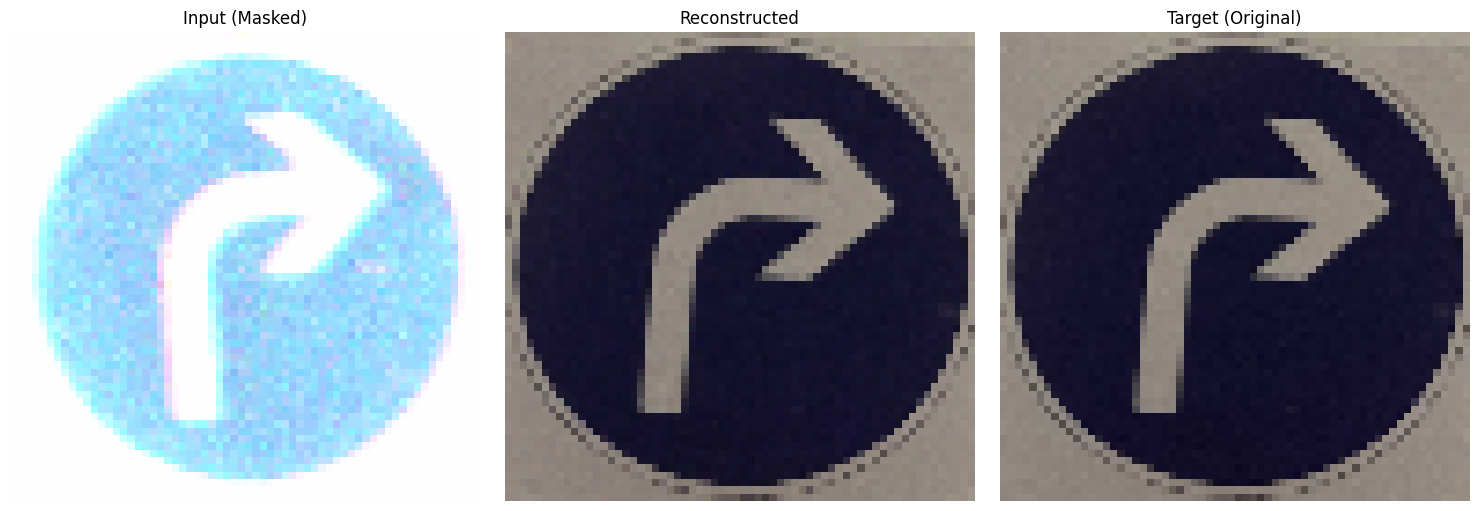

Vergleich für Bild: rechts_abbiegen/masked_827.png


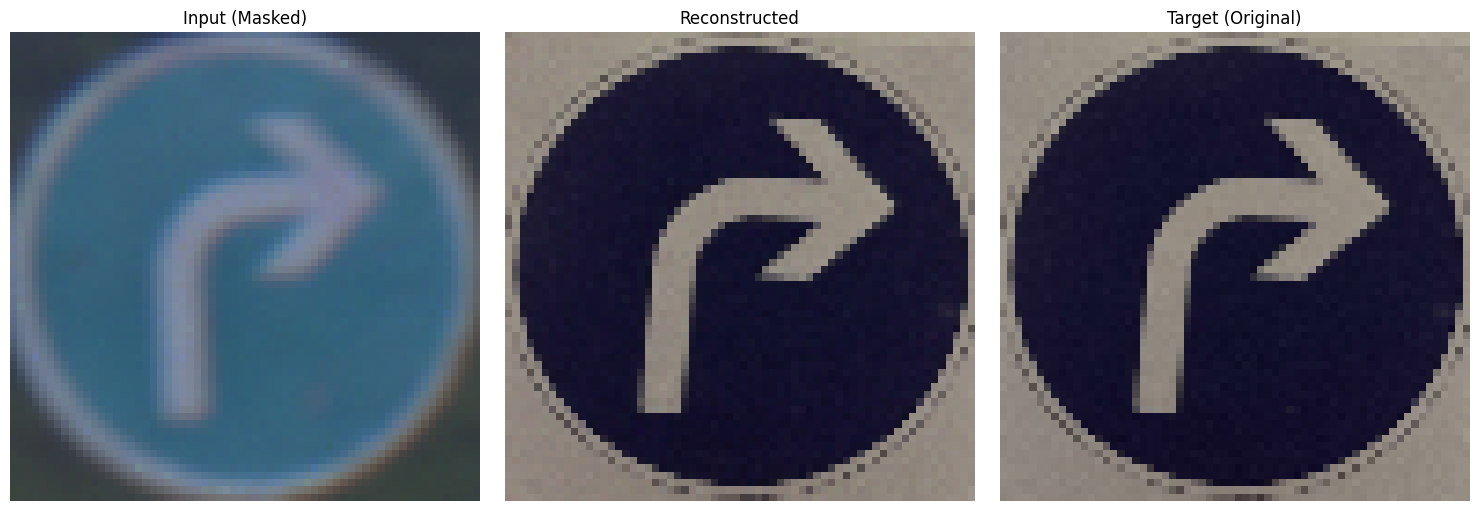

Vergleich für Bild: rechts_abbiegen/masked_338.png


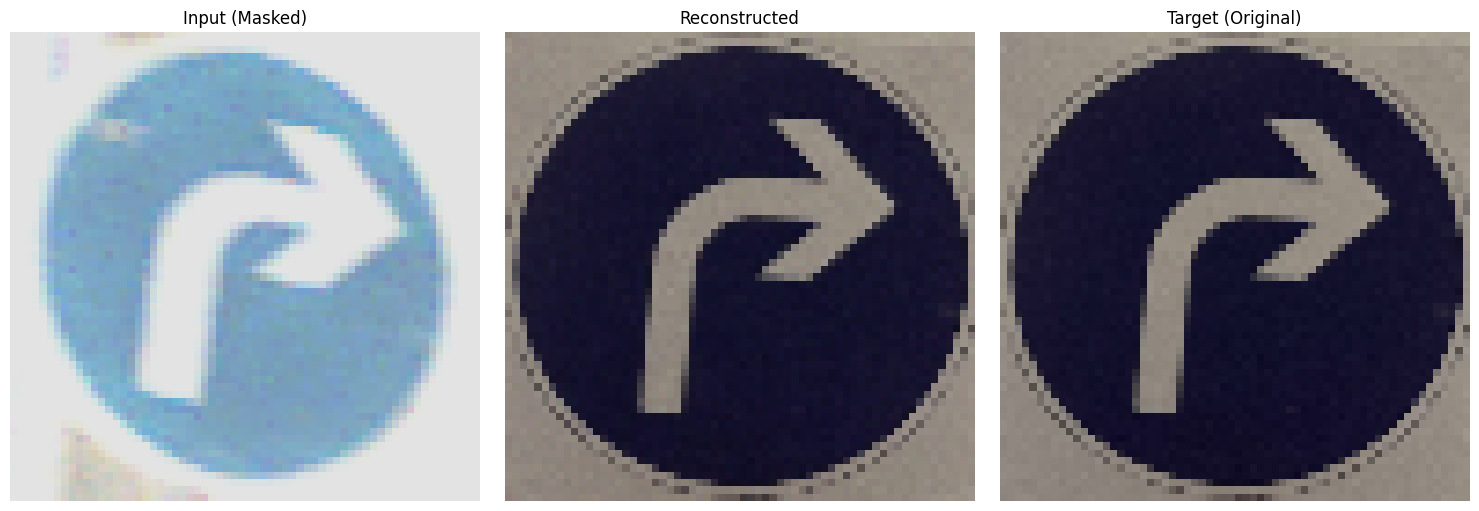

Vergleich für Bild: geradeaus_rechts/masked_386.png


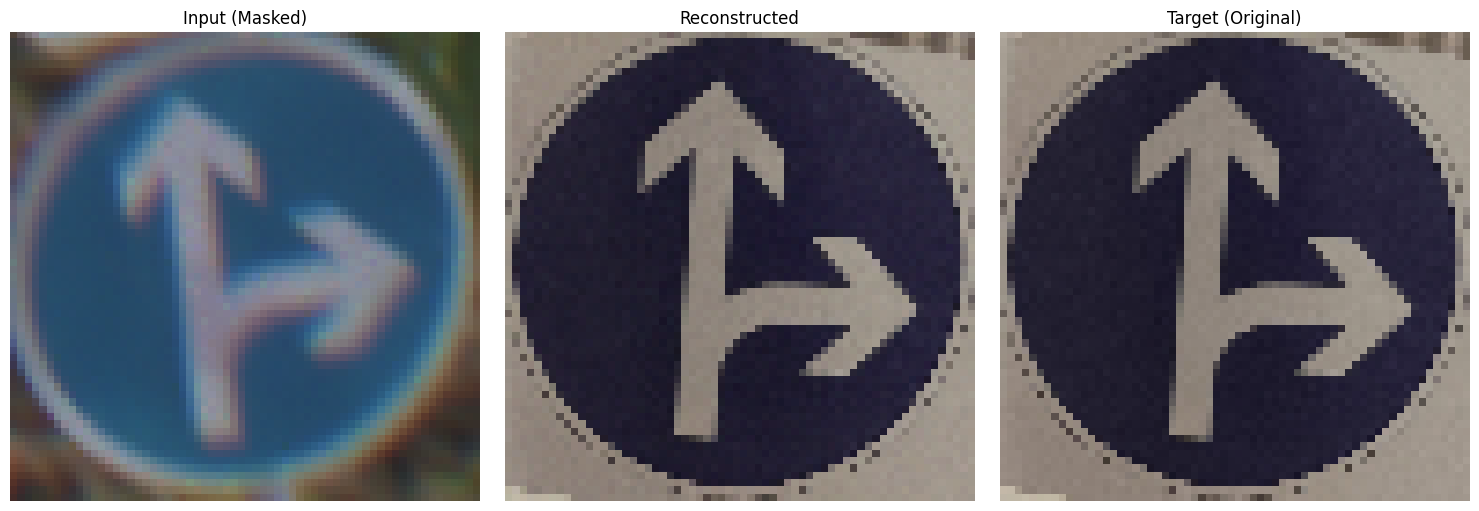

Vergleich für Bild: geradeaus_rechts/masked_549.png


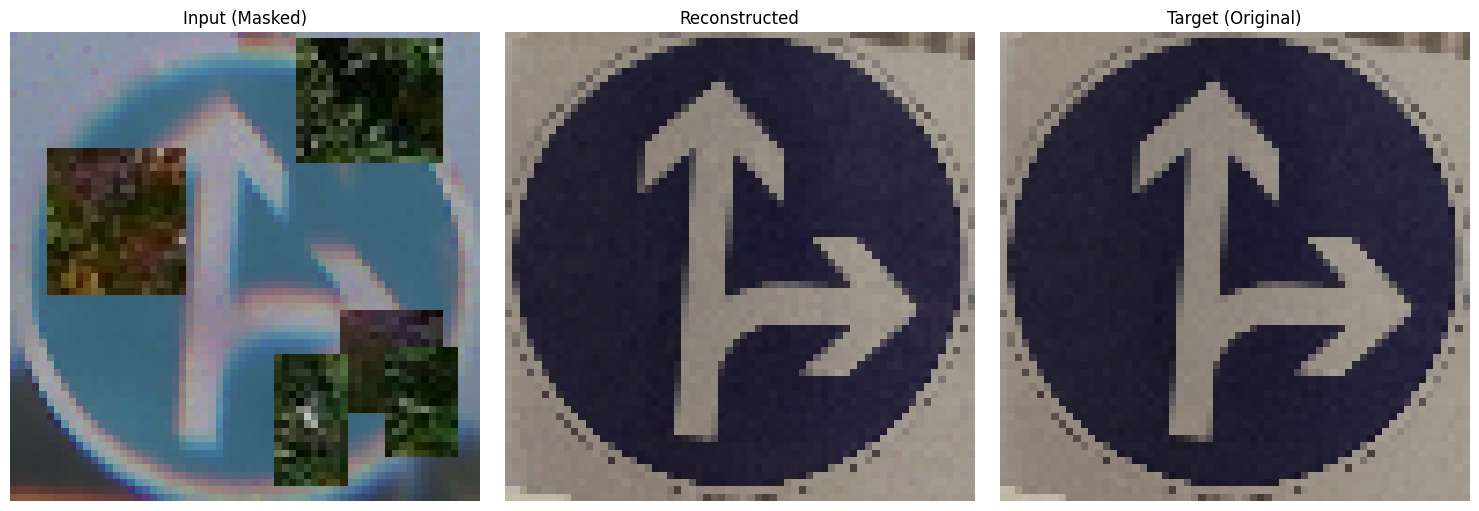

Vergleich für Bild: geradeaus_rechts/masked_40.png


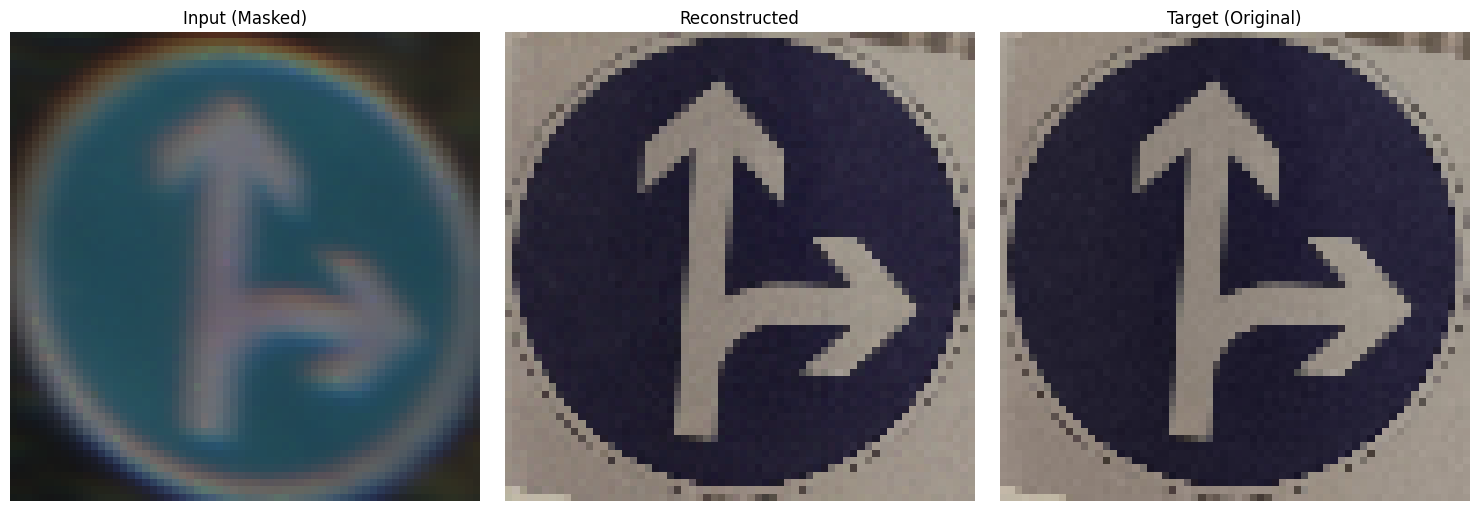

Vergleich für Bild: geradeaus_rechts/masked_946.png


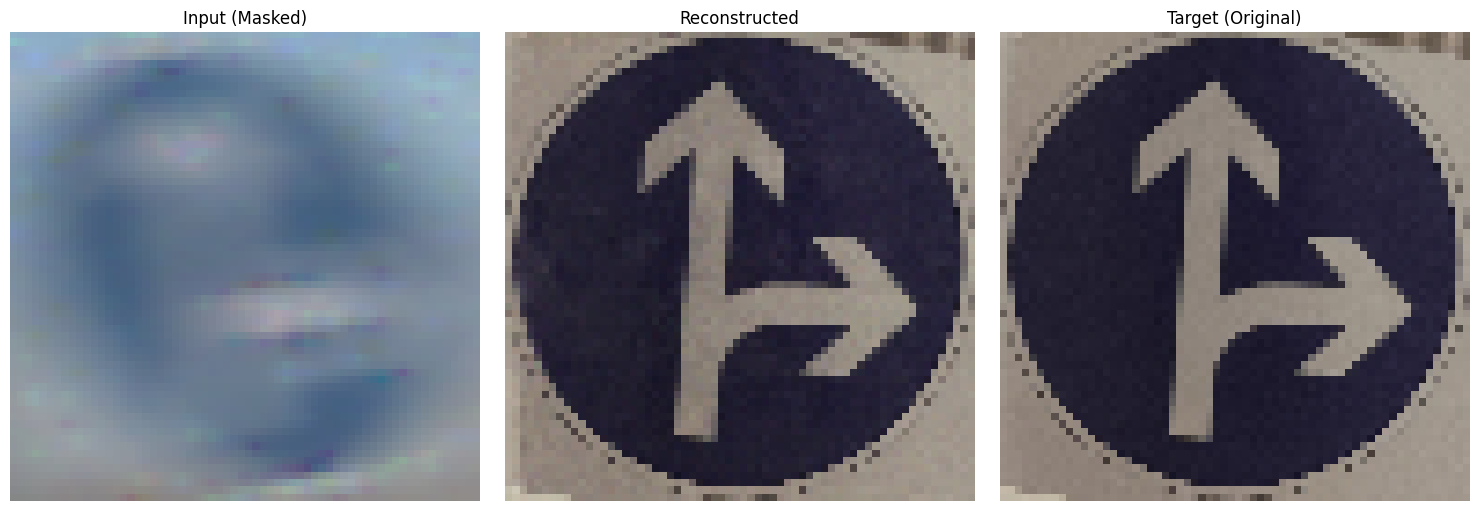

Vergleich für Bild: geradeaus_rechts/masked_928.png


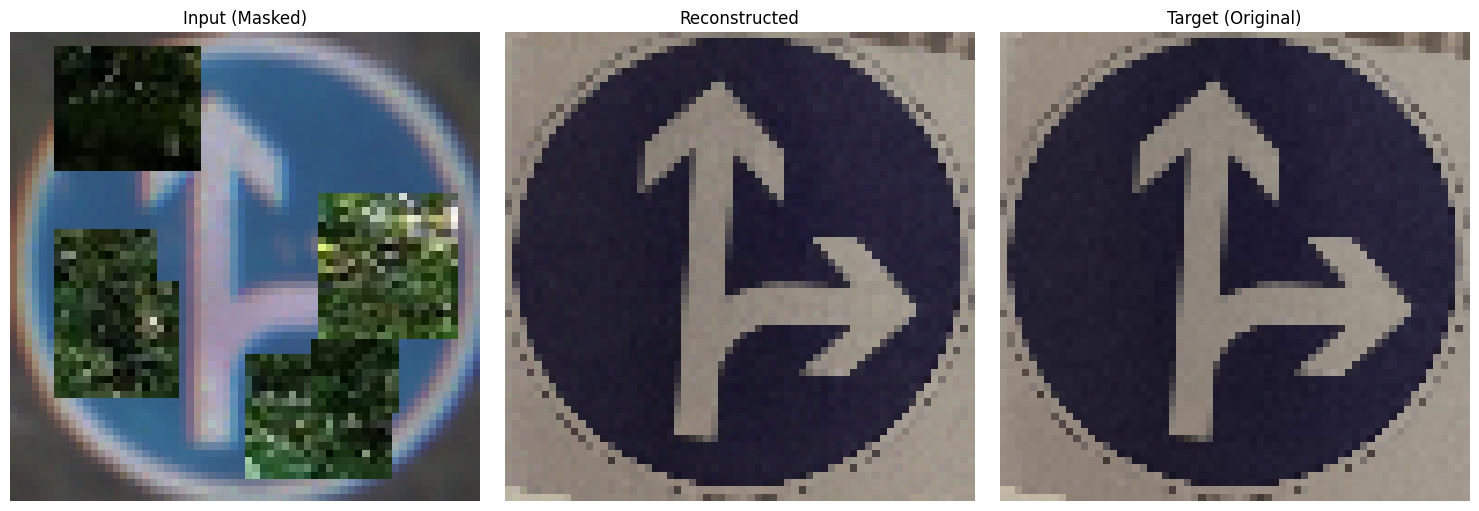

Vergleich für Bild: geradeaus_rechts/masked_103.png


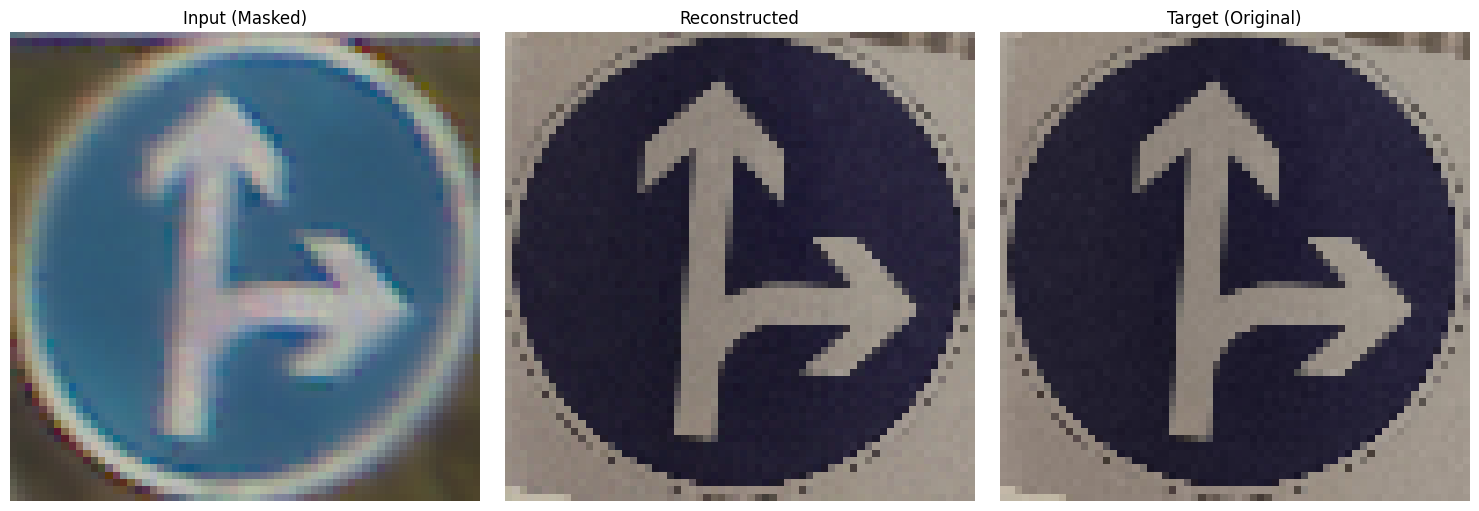

Vergleich für Bild: geradeaus_rechts/masked_421.png


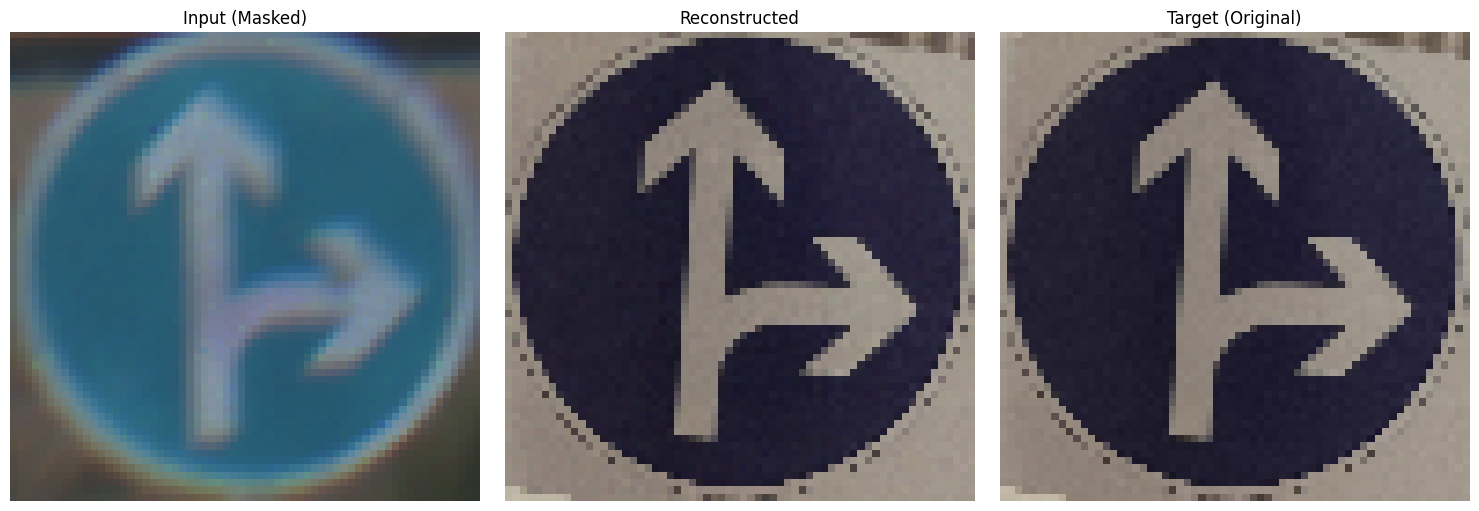

Vergleich für Bild: geradeaus_rechts/masked_351.png


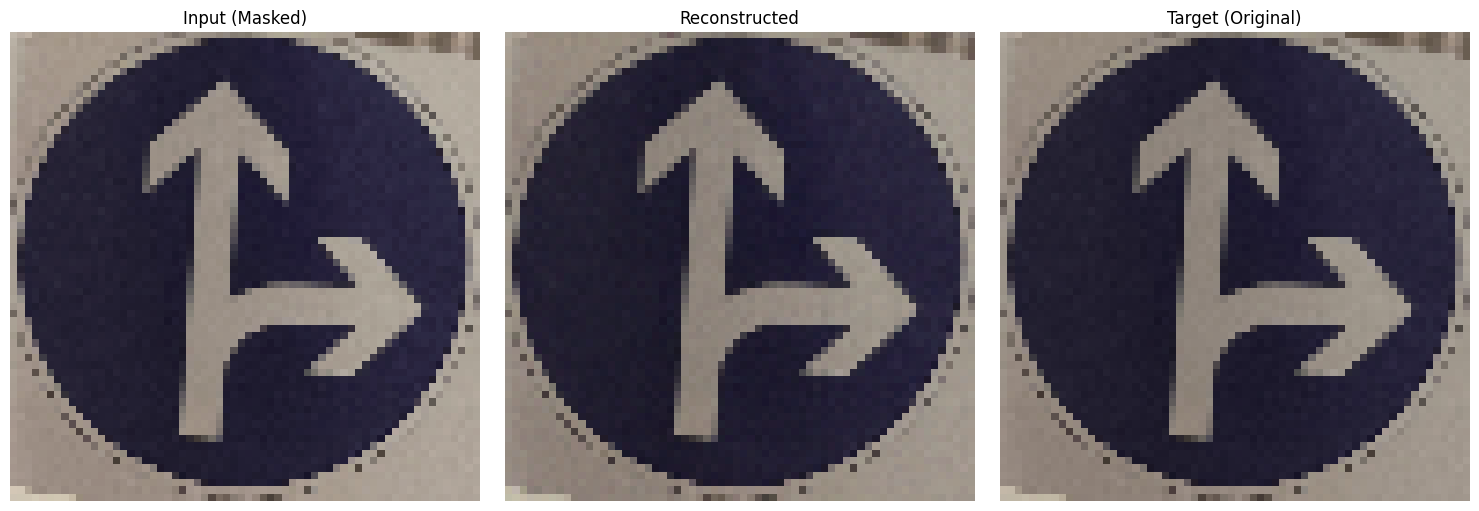

Vergleich für Bild: geradeaus_rechts/masked_1095.png


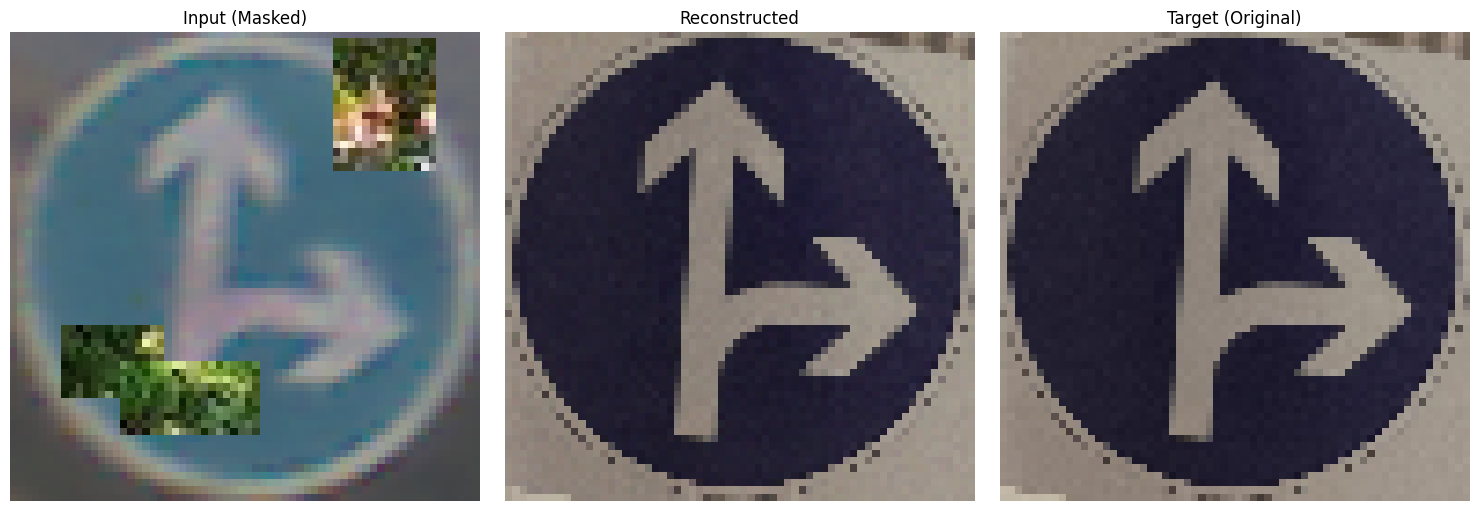

Vergleich für Bild: geradeaus_rechts/masked_558.png


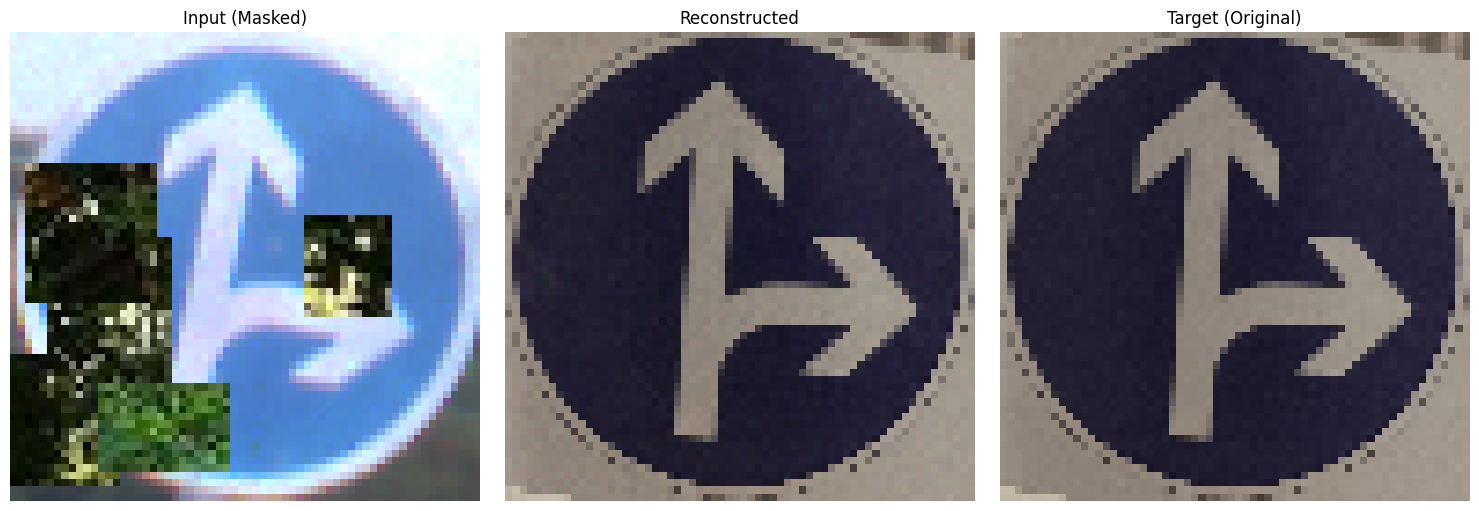

In [ ]:
import os
import random
import numpy as np
import onnxruntime as ort
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

# ONNX-Modellpfad
onnx_model_path = "/content/decoder_ncoder.onnx"

# Test-Verzeichnis
test_dir = "/content/dataset/test"

# Bildvorverarbeitung
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalisierung auf [-1, 1]
])

# Rücknormalisierung für Visualisierung
def denormalize(image_tensor):
    return (image_tensor * 0.5 + 0.5).clip(0, 1)  # Rückumwandlung in den Bereich [0, 1]

# ONNX-Modell laden und Inferenz-Session erstellen
onnx_session = ort.InferenceSession(onnx_model_path)
print("ONNX-Modell erfolgreich geladen.")

# Funktion, um ein Bild zu laden und vorzubereiten
def load_and_preprocess_image(image_path):
    image = Image.open(image_path).convert("RGB")
    return transform(image).unsqueeze(0).numpy()  # Bild vorverarbeiten und Batch-Dimension hinzufügen

# Funktion, um die Ausgaben zu vergleichen
def compare_images(input_path, target_image):
    # Eingabebild laden
    input_image = load_and_preprocess_image(input_path)

    # ONNX-Inferenz
    reconstructed_image = onnx_session.run(None, {"input": input_image})[0]

    # Rücknormalisierung
    reconstructed_image = denormalize(torch.tensor(reconstructed_image[0])).permute(1, 2, 0).numpy()  # Channel-last
    target_image = denormalize(torch.tensor(target_image)).permute(1, 2, 0).numpy()  # Zielbild normalisieren
    input_image = denormalize(torch.tensor(input_image[0])).permute(1, 2, 0).numpy()  # Eingabebild normalisieren

    # Bilder anzeigen
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].imshow(input_image)
    axes[0].set_title("Input (Masked)")
    axes[0].axis("off")

    axes[1].imshow(reconstructed_image)
    axes[1].set_title("Reconstructed")
    axes[1].axis("off")

    axes[2].imshow(target_image)
    axes[2].set_title("Target (Original)")
    axes[2].axis("off")

    plt.tight_layout()
    plt.show()

# Alle Klassenordner im Test-Verzeichnis durchlaufen
for class_name in os.listdir(test_dir):
    class_input_dir = os.path.join(test_dir, class_name, "input")
    class_output_dir = os.path.join(test_dir, class_name, "output")

    if not os.path.exists(class_input_dir) or not os.path.exists(class_output_dir):
        print(f"Fehlende Ordner für Klasse: {class_name}")
        continue

    # Zielbild (clear.png) laden
    target_image_path = os.path.join(class_output_dir, "clear.png")
    if not os.path.exists(target_image_path):
        print(f"Zielbild fehlt für Klasse: {class_name}")
        continue
    target_image = transform(Image.open(target_image_path).convert("RGB")).numpy()

    # Wähle 10 zufällige Bilder aus dem Klassenordner
    input_files = [f for f in os.listdir(class_input_dir) if f.endswith(".png")]
    selected_files = random.sample(input_files, min(10, len(input_files)))

    # Vergleich für die ausgewählten Bilder
    for file_name in selected_files:
        input_path = os.path.join(class_input_dir, file_name)

        print(f"Vergleich für Bild: {class_name}/{file_name}")
        compare_images(input_path, target_image)
